In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/rutikhatim/Assignment/main/Multi%20Linear%20Regression/ToyotaCorolla.csv',encoding='latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [16]:
df.describe(include='all')

Id                                              Model  \
count   1436.000000                                               1436   
unique          NaN                                                372   
top             NaN  TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...   
freq            NaN                                                107   
mean     721.555014                                                NaN   
std      416.476890                                                NaN   
min        1.000000                                                NaN   
25%      361.750000                                                NaN   
50%      721.500000                                                NaN   
75%     1081.250000                                                NaN   
max     1442.000000                                                NaN   

               Price    Age_08_04    Mfg_Month     Mfg_Year             KM  \
count    1436.000000  1436.000000  1436.000000  1436.000000    1436.000000   
unique           NaN          NaN          NaN          NaN            NaN   
top              NaN          NaN          NaN          NaN            NaN   
freq             NaN          NaN          NaN          NaN            NaN   
mean    10730.824513    55.947075     5.548747  1999.625348   68533.259749   
std      3626.964585    18.599988     3.354085     1.540722   37506.448872   
min      4350.000000     1.000000     1.000000  1998.000000       1.000000   
25%      8450.000000    44.000000     3.000000  1998.000000   43000.000000   
50%      9900.000000    61.000000     5.000000  1999.000000   63389.500000   
75%     11950.000000    70.000000     8.000000  2001.000000   87020.750000   
max     32500.000000    80.000000    12.000000  2004.000000  243000.000000   

       Fuel_Type           HP    Met_Color  ... Central_Lock  Powered_Windows  \
count       1436  1436.000000  1436.000000  ...  1436.000000      1436.000000   
unique         3          NaN          NaN  ...          NaN              NaN   
top       Petrol          NaN          NaN  ...          NaN              NaN   
freq        1264          NaN          NaN  ...          NaN              NaN   
mean         NaN   101.502089     0.674791  ...     0.580084         0.561978   
std          NaN    14.981080     0.468616  ...     0.493717         0.496317   
min          NaN    69.000000     0.000000  ...     0.000000         0.000000   
25%          NaN    90.000000     0.000000  ...     0.000000         0.000000   
50%          NaN   110.000000     1.000000  ...     1.000000         1.000000   
75%          NaN   110.000000     1.000000  ...     1.000000         1.000000   
max          NaN   192.000000     1.000000  ...     1.000000         1.000000   

        Power_Steering        Radio    Mistlamps  Sport_Model  \
count      1436.000000  1436.000000  1436.000000  1436.000000   
unique             NaN          NaN          NaN          NaN   
top                NaN          NaN          NaN          NaN   
freq               NaN          NaN          NaN          NaN   
mean          0.977716     0.146240     0.256964     0.300139   
std           0.147657     0.353469     0.437111     0.458478   
min           0.000000     0.000000     0.000000     0.000000   
25%           1.000000     0.000000     0.000000     0.000000   
50%           1.000000     0.000000     0.000000     0.000000   
75%           1.000000     0.000000     1.000000     1.000000   
max           1.000000     1.000000     1.000000     1.000000   

        Backseat_Divider  Metallic_Rim  Radio_cassette      Tow_Bar  
count        1436.000000   1436.000000     1436.000000  1436.000000  
unique               NaN           NaN             NaN          NaN  
top                  NaN           NaN             NaN          NaN  
freq                 NaN           NaN             NaN          NaN  
mean            0.770195      0.204735        0.145543     0.277855  
std             0

In [17]:
data=df.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [18]:
data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [19]:
data.describe(include='all')

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [21]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [22]:
data.duplicated().sum()

1

In [23]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

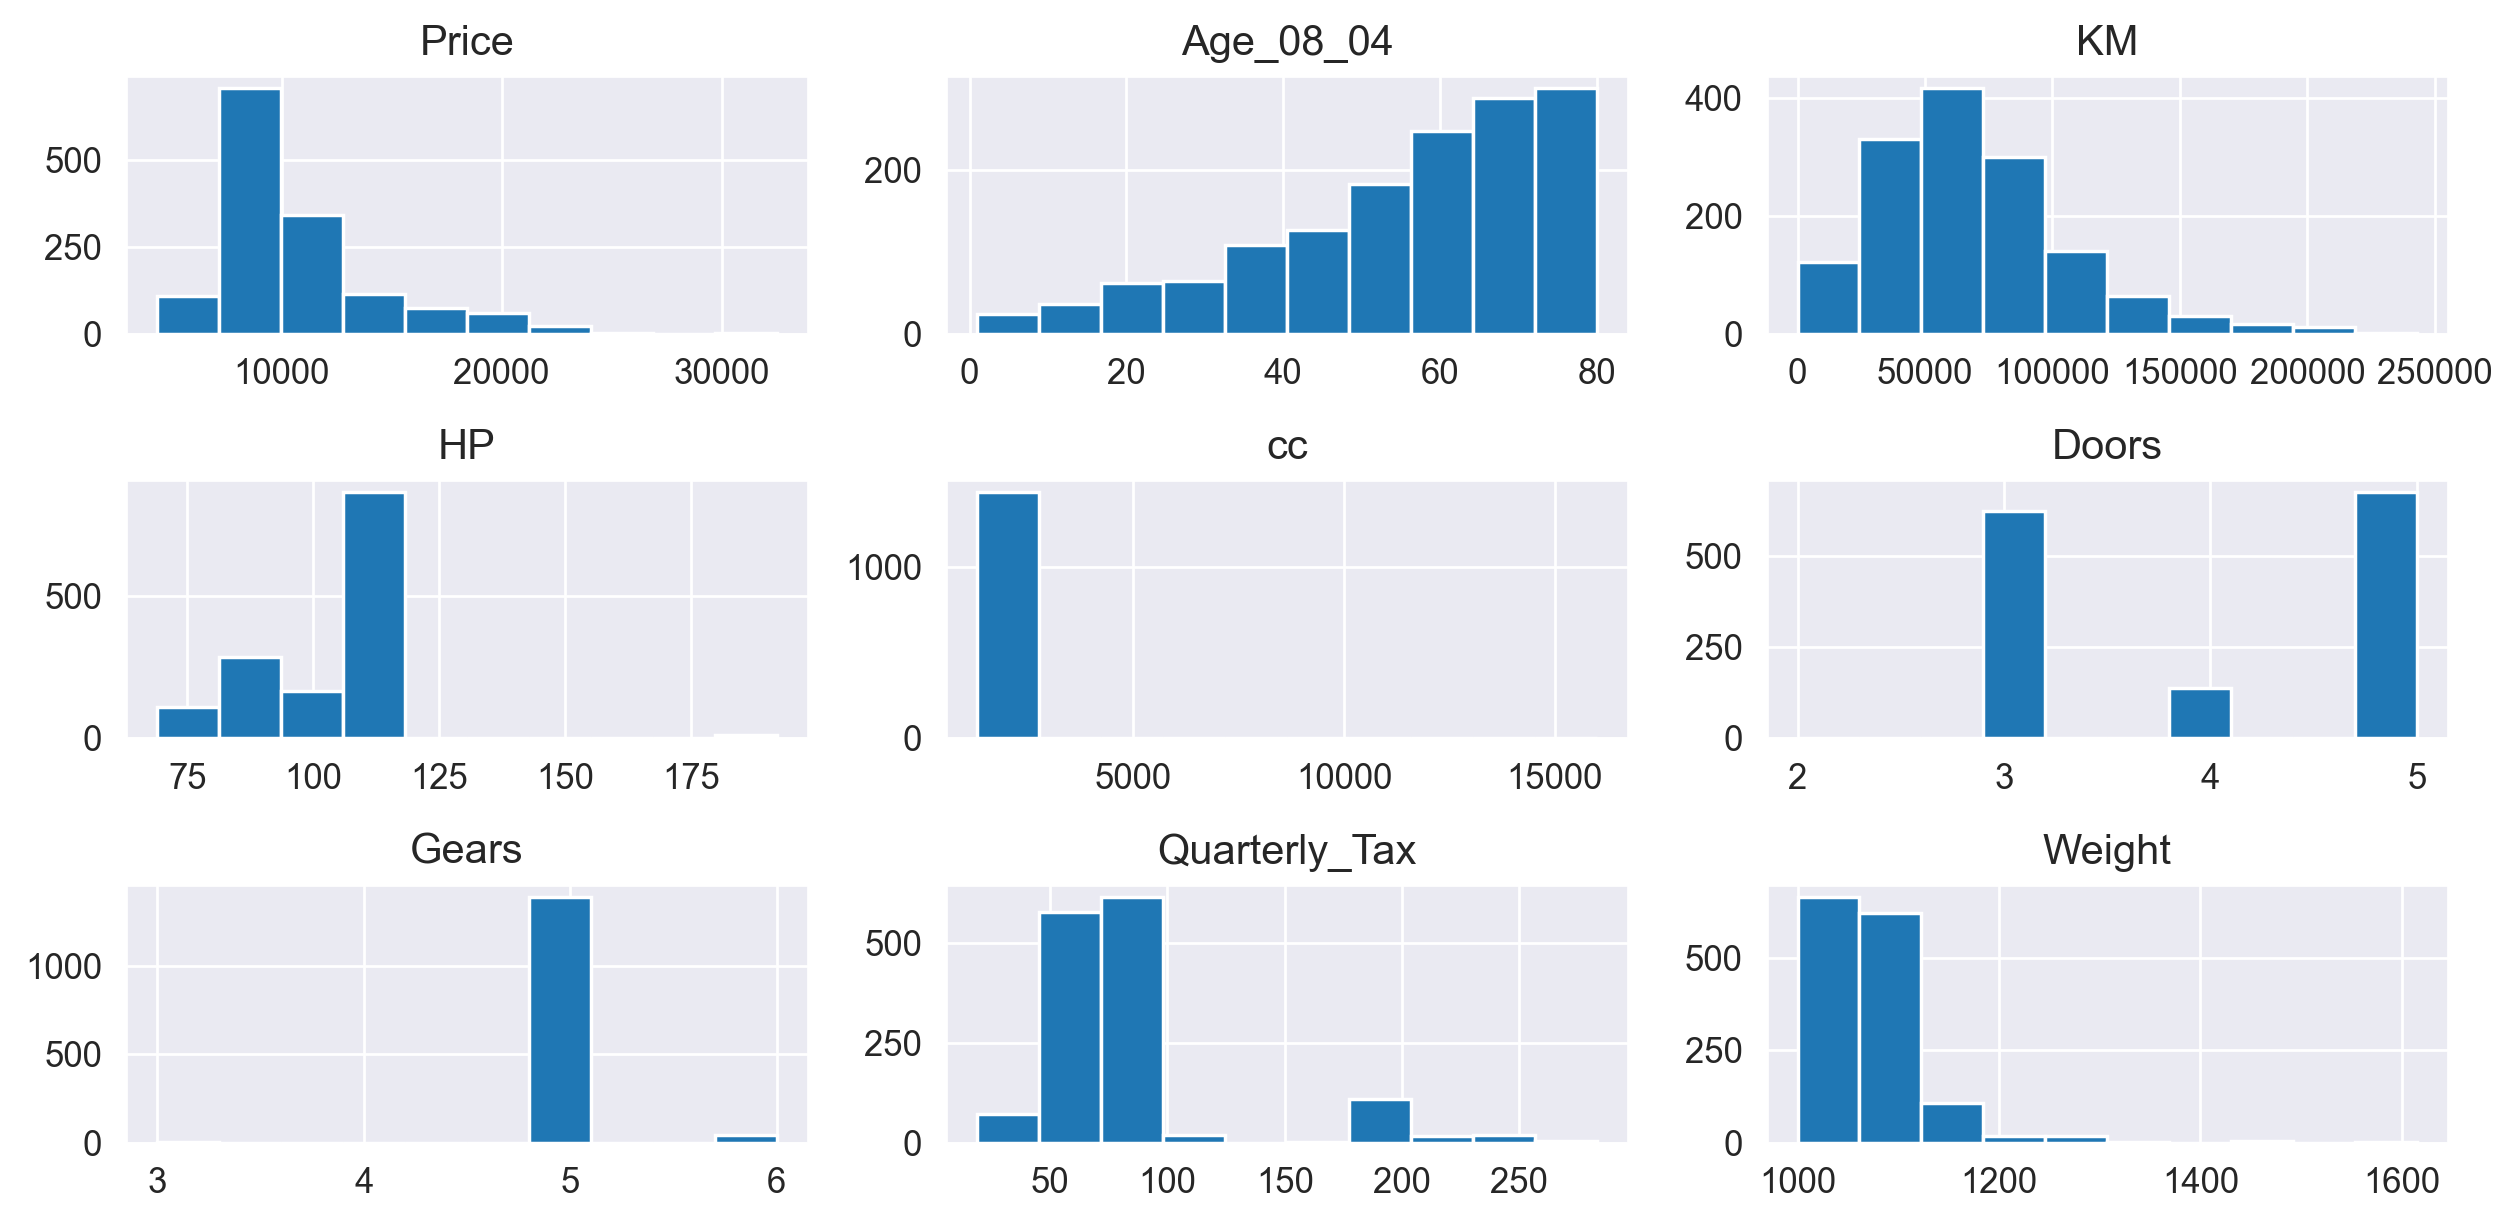

In [24]:
data.hist()
plt.tight_layout()

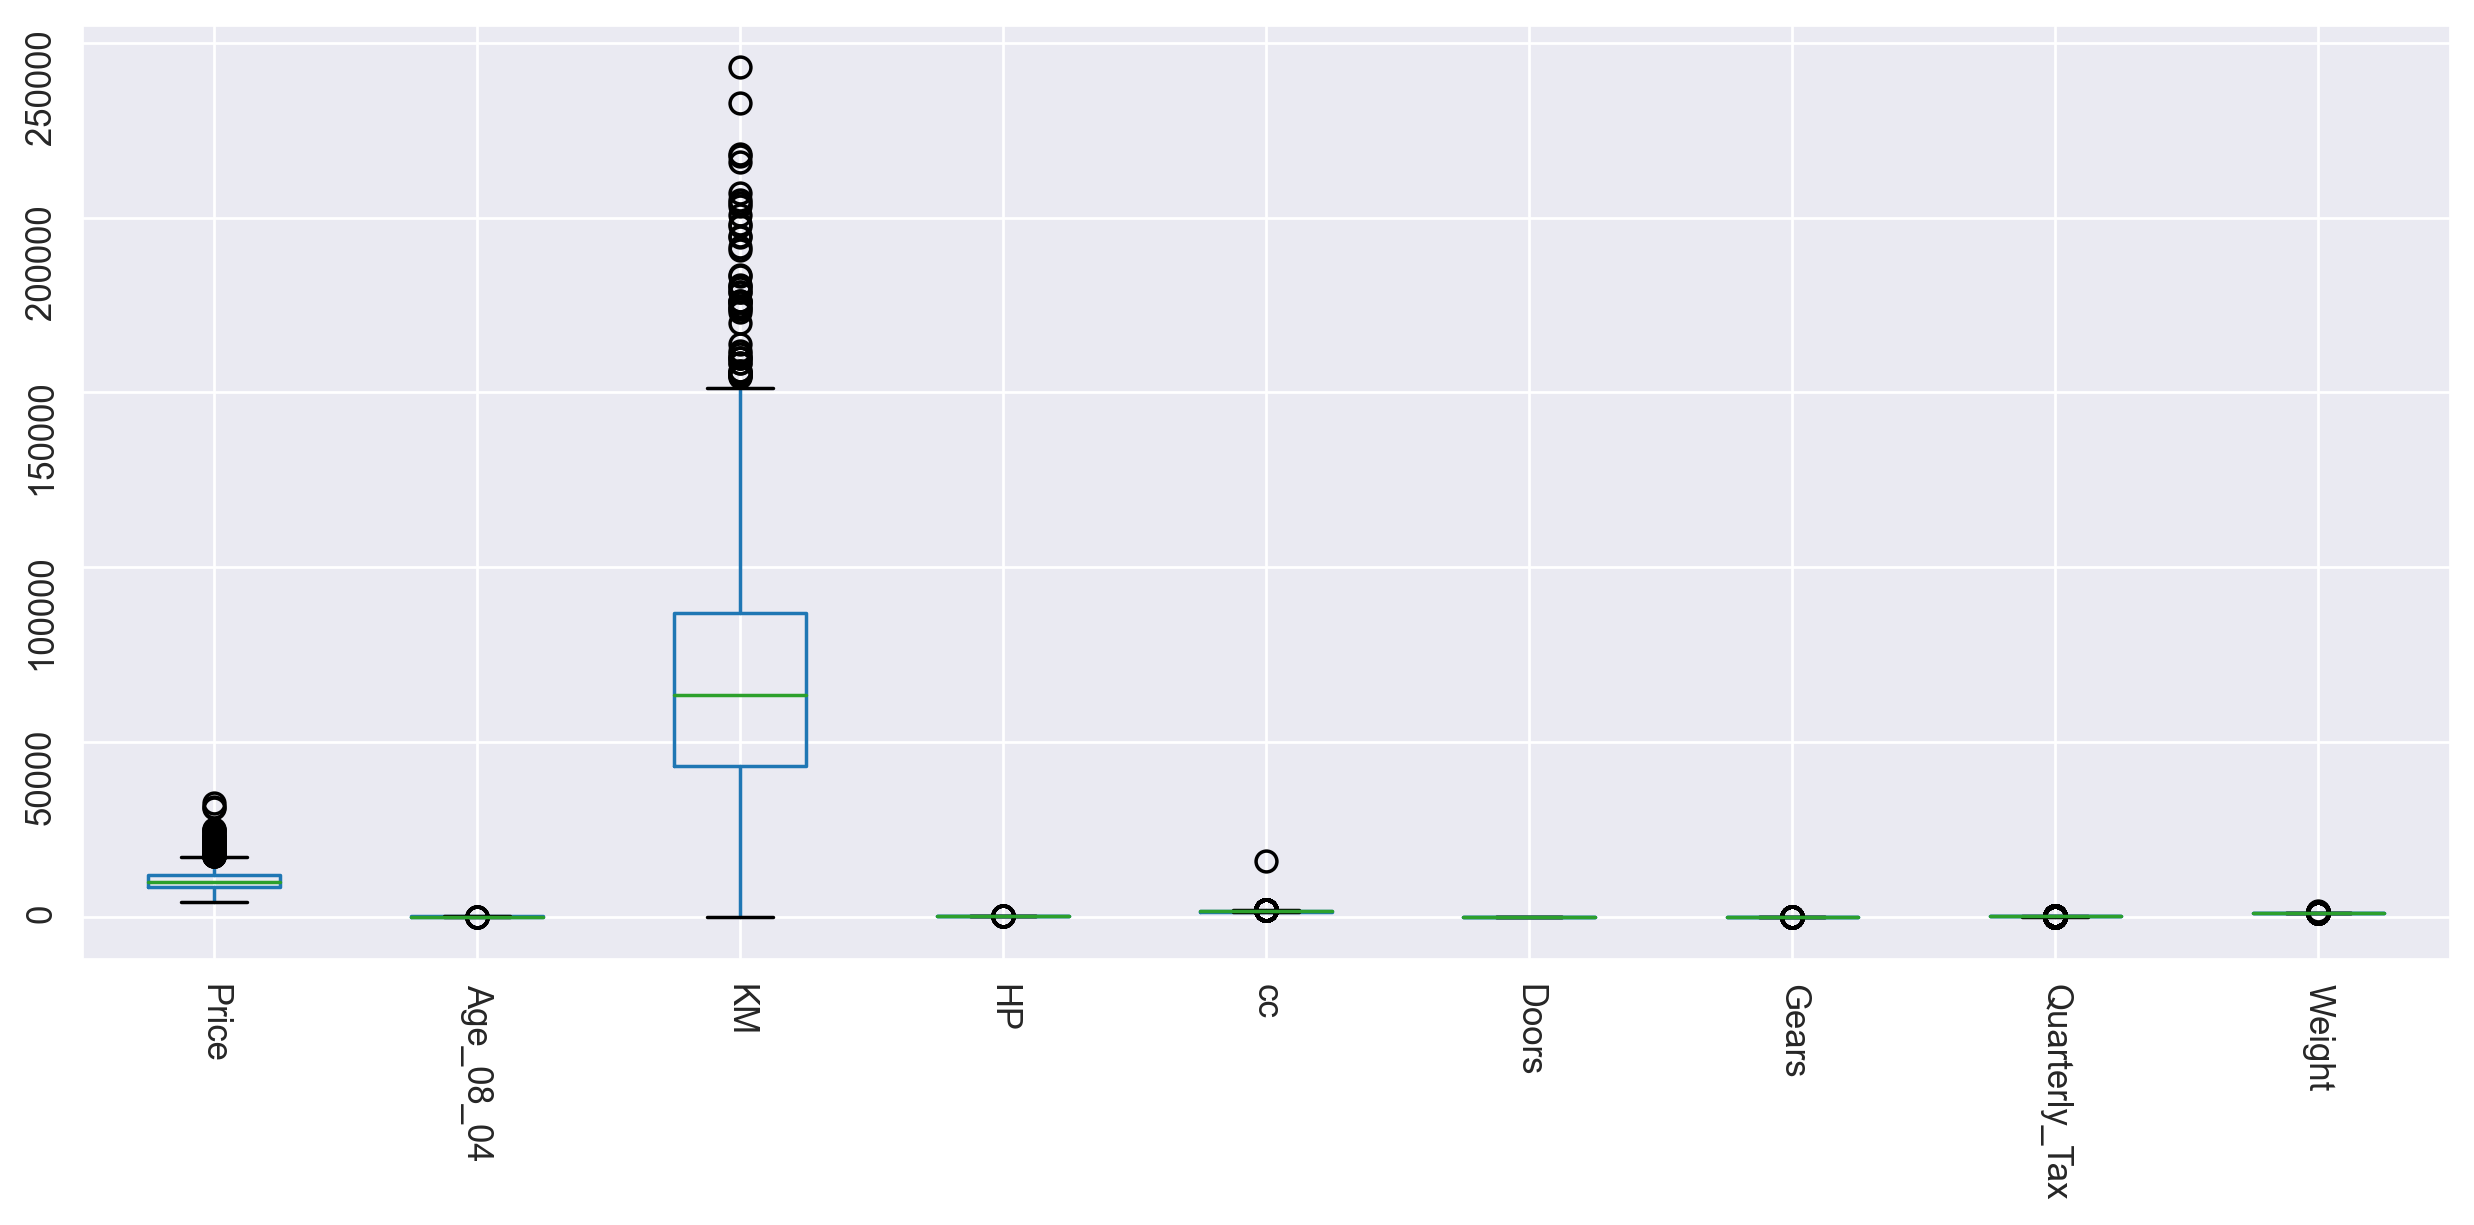

In [25]:
data.boxplot()
plt.xticks(rotation=270)
plt.yticks(rotation=90)
plt.tight_layout()

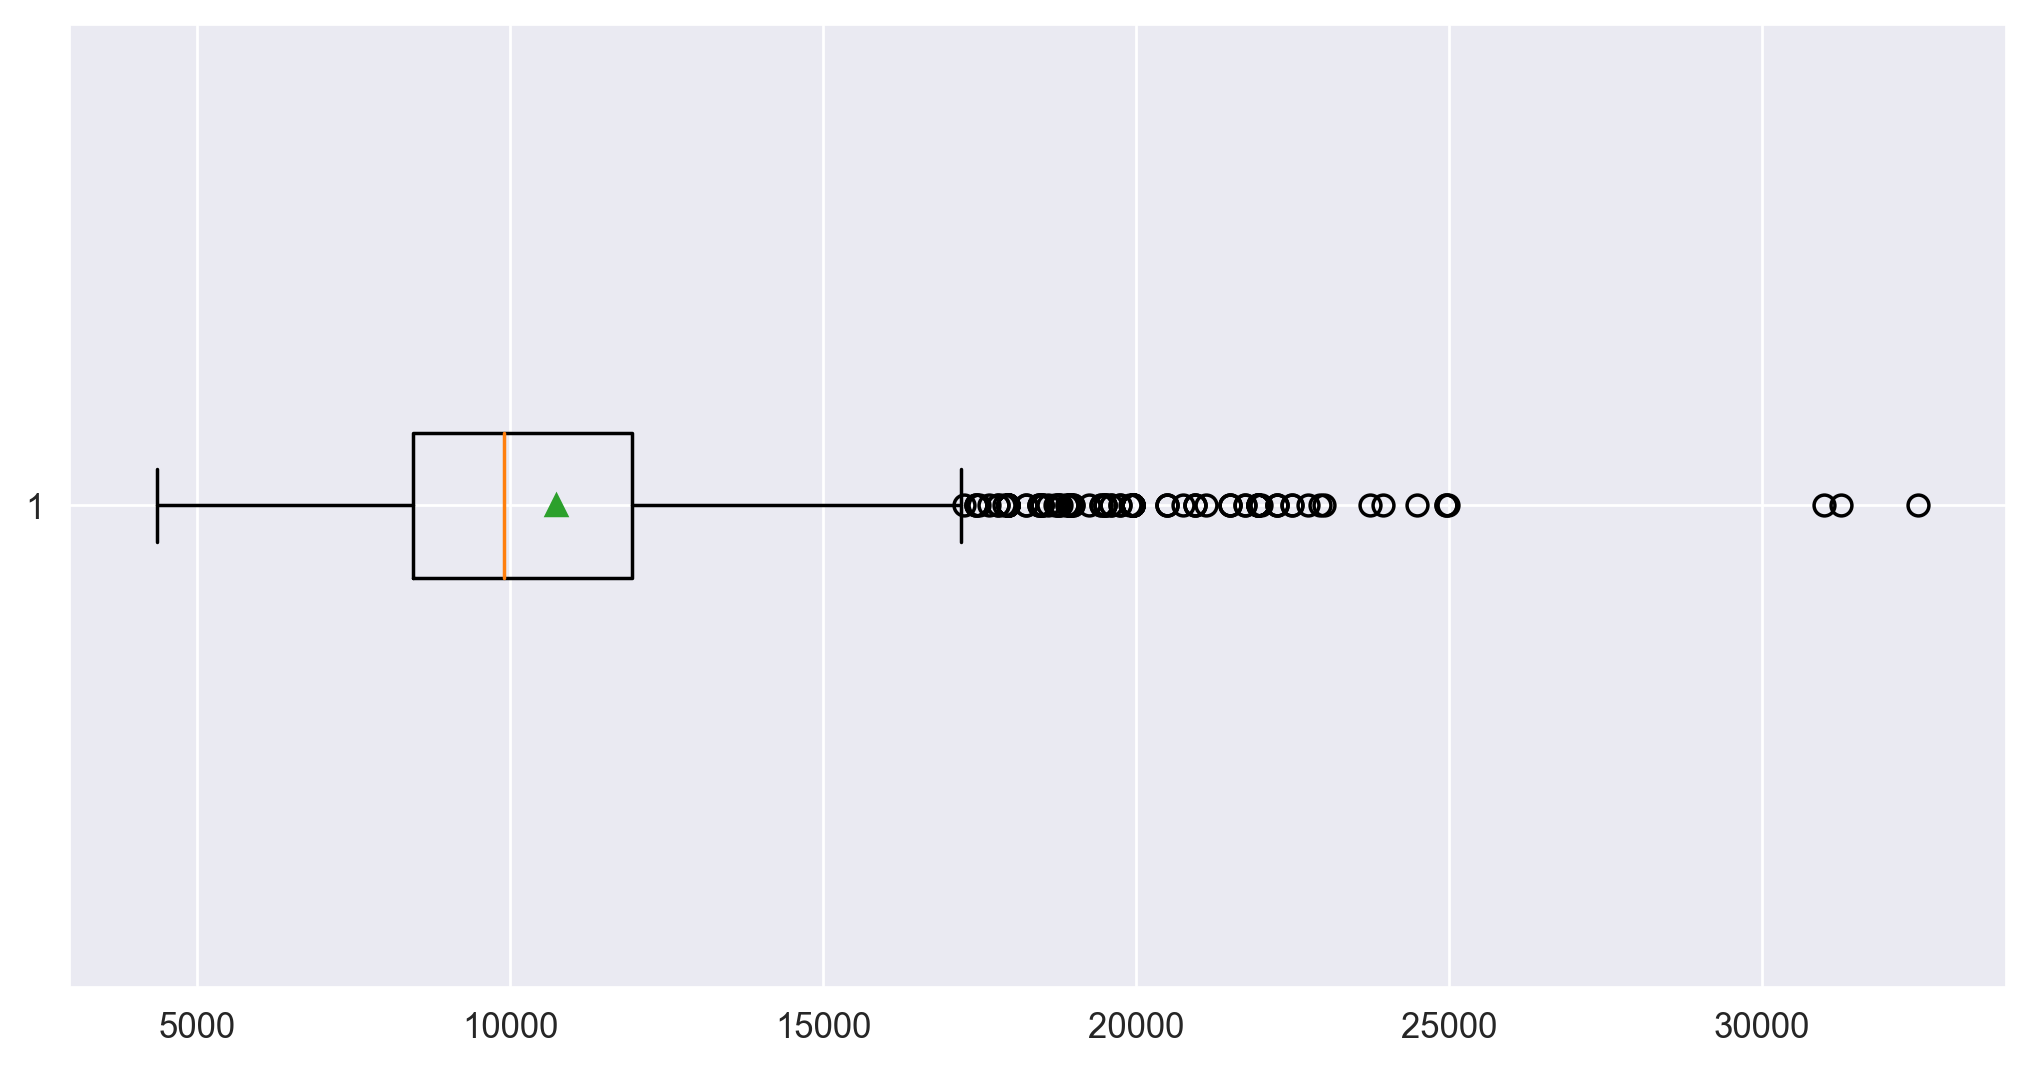

In [26]:
plt.boxplot(data['Price'],vert=False,showmeans=True)
plt.show()

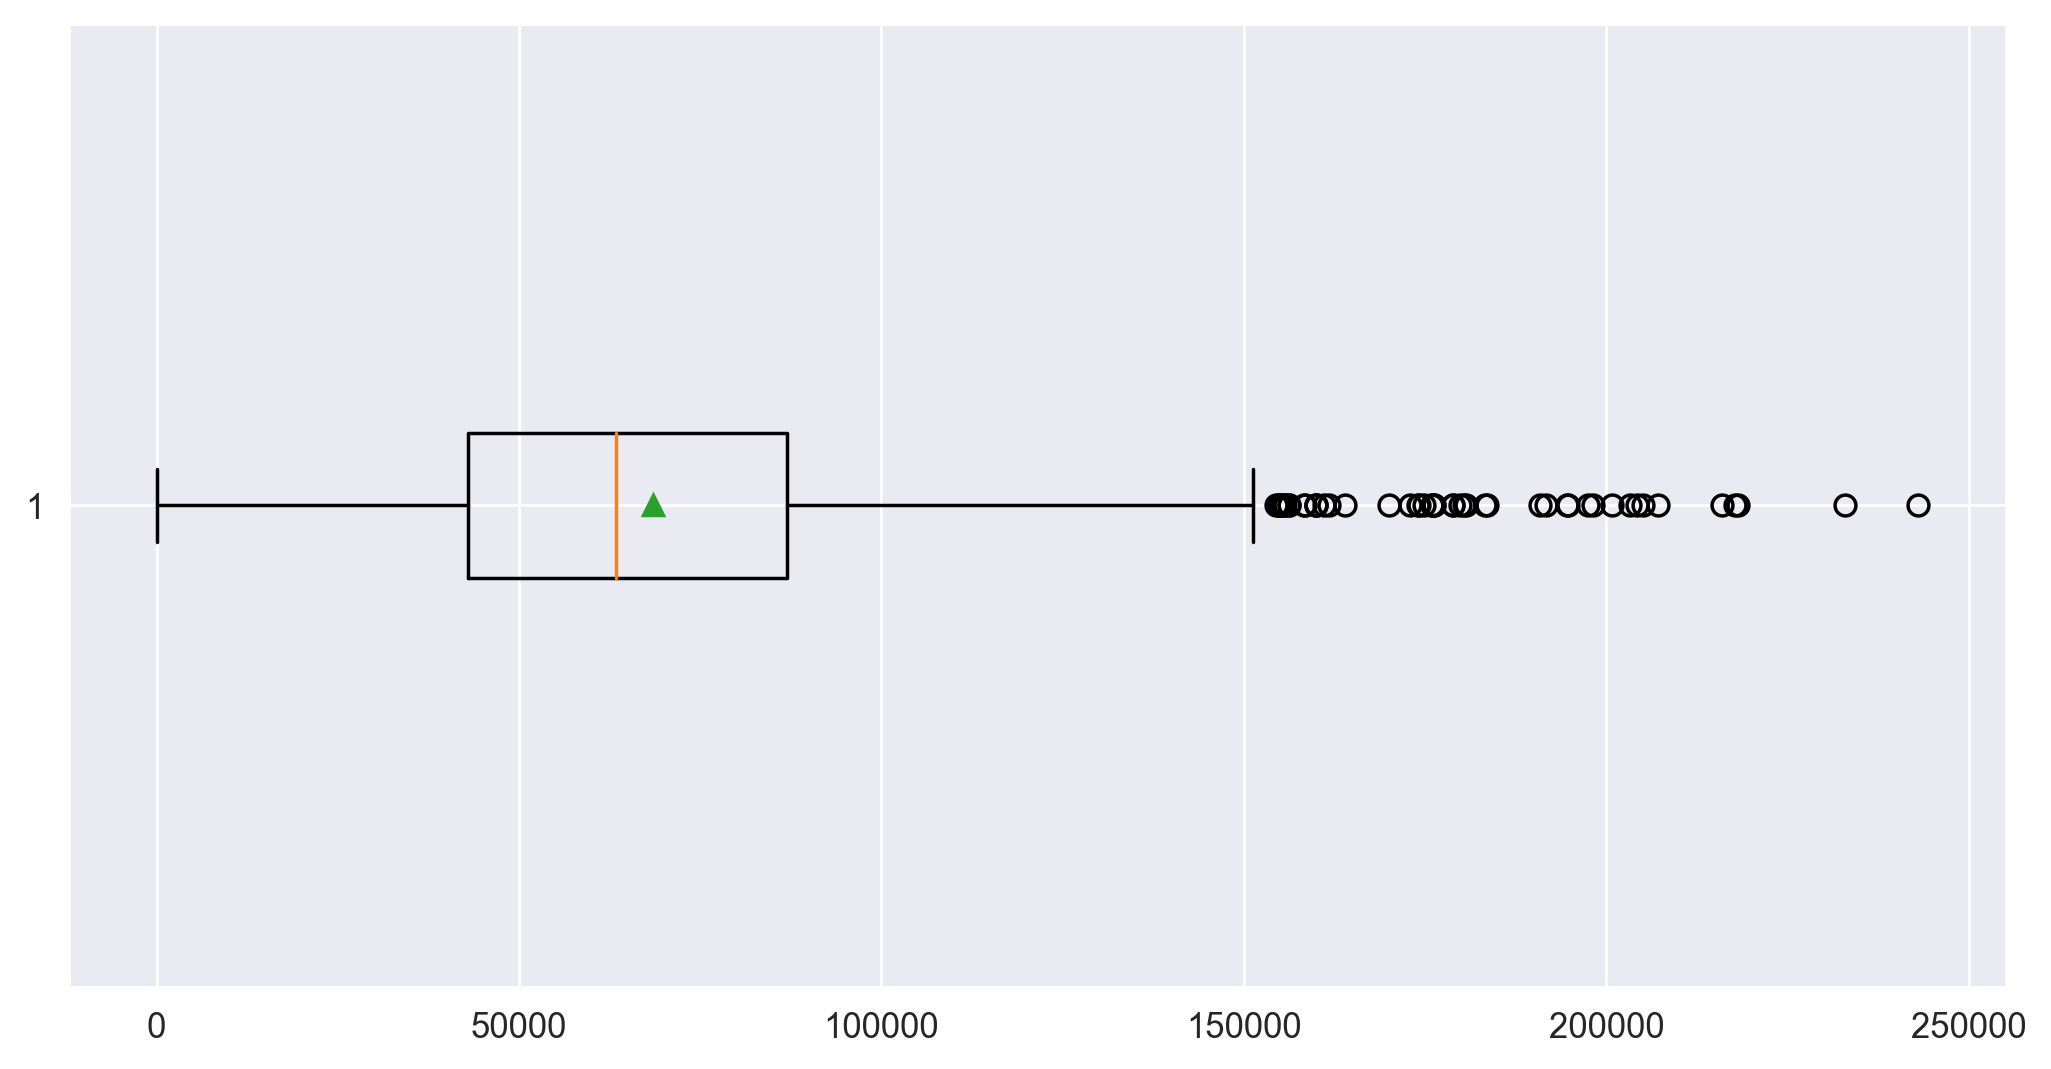

In [27]:
plt.boxplot(data['KM'],vert=False,showmeans=True)
plt.show()

In [28]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [29]:
outlier_detection(data,'Price')

(3200.0, 17200.0)

In [30]:
data[data['Price']>17200.0]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
7    18600         30  75889   90  2000      3      5            210    1245
8    21500         27  19700  192  1800      3      5            100    1185
10   20950         25  31461  192  1800      3      6            100    1185
11   19950         22  43610  192  1800      3      6            100    1185
12   19600         25  32189  192  1800      3      6            100    1185
..     ...        ...    ...  ...   ...    ...    ...            ...     ...
182  21125          2    225   97  1400      5      5             85    1110
183  21500          2     15  110  1600      5      5             85    1130
184  17795          1      1   98  1400      4      5             19    1100
185  18245          1      1  110  1600      5      5             19    1075
523  18950         49  49568  110  1600      3      5             19    1105

[110 rows x 9 columns]

In [31]:
#Capping Outliers
data.loc[data['Price']>17200.0,'Price'] = 17200.0

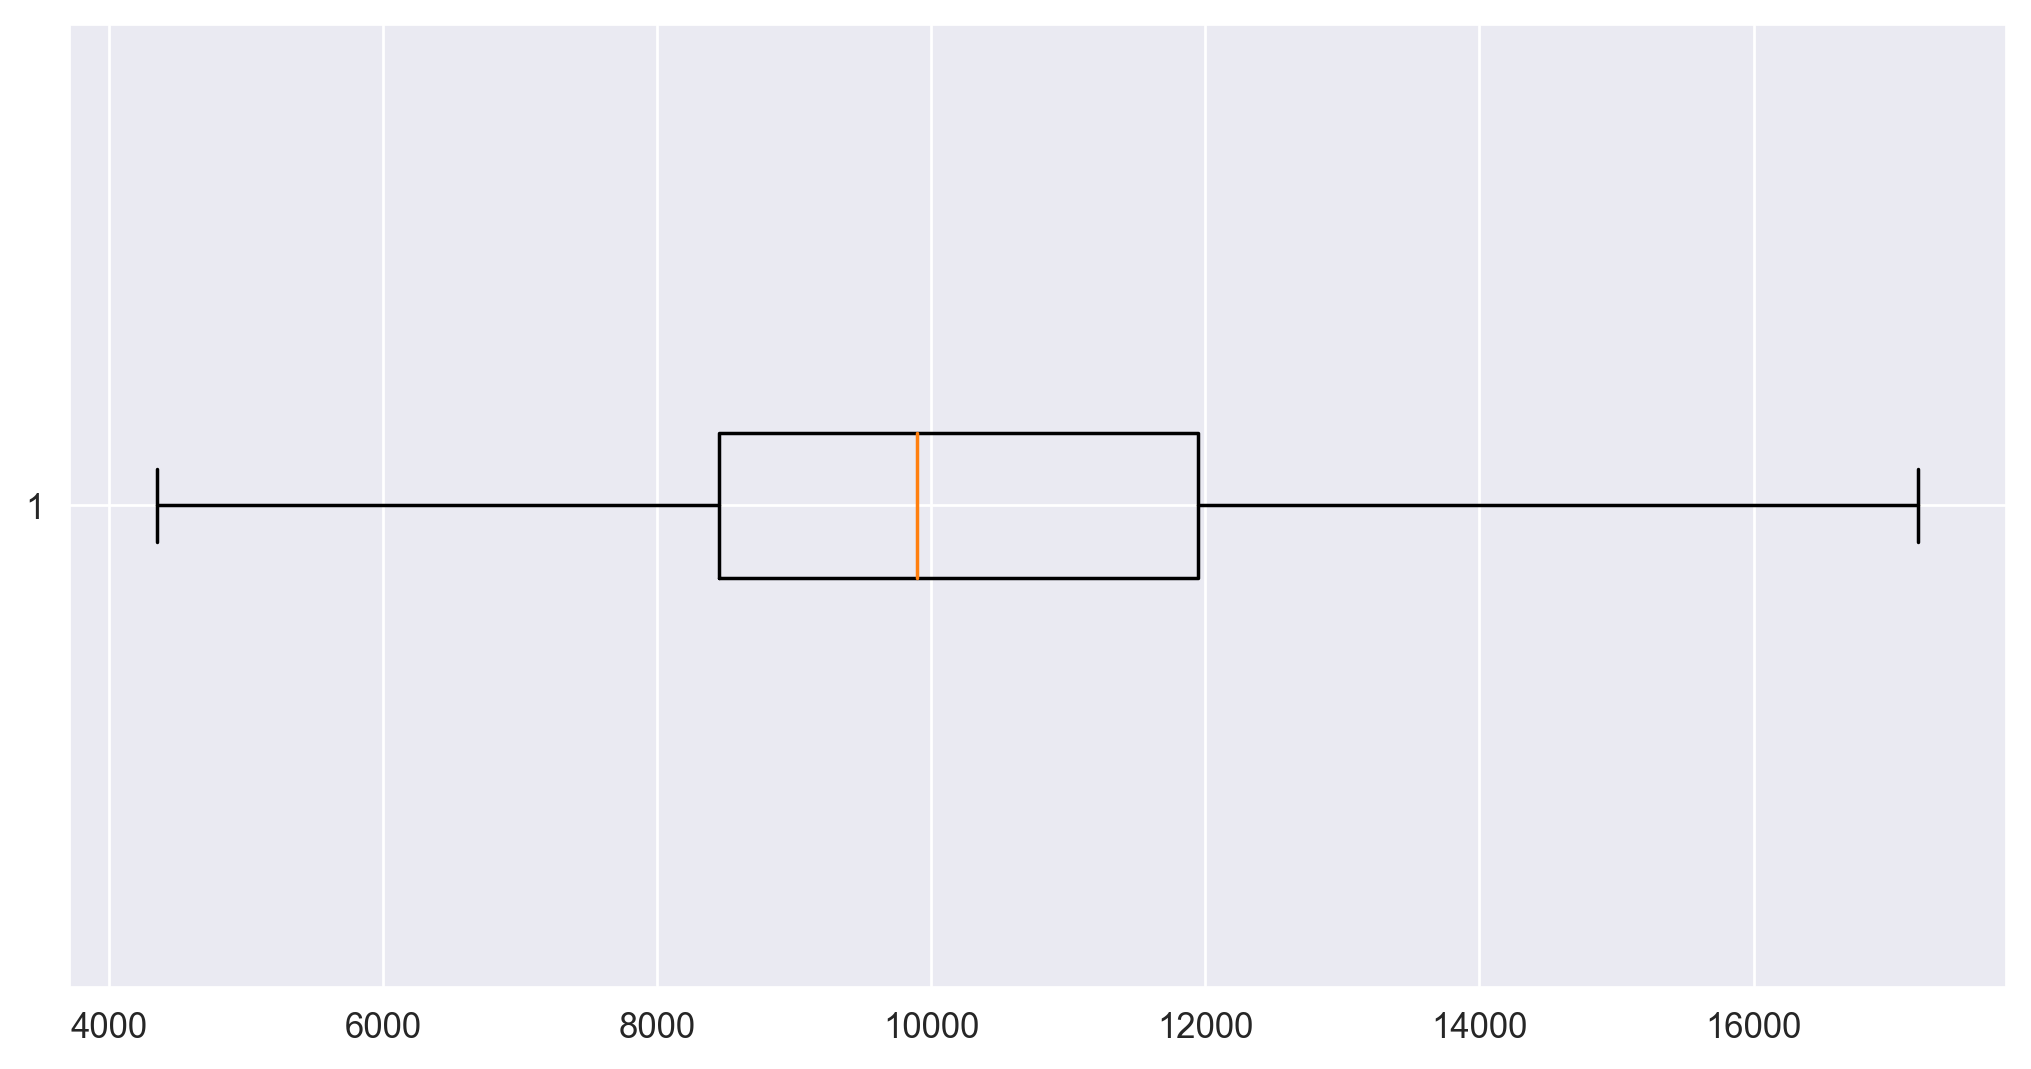

In [32]:
plt.boxplot(data['Price'],vert=False)
plt.show()

In [33]:
outlier_detection(data,'Age_08_04')

(5.0, 109.0)

In [34]:
outlier_detection(data,'KM')

(-23031.125, 153051.875)

In [35]:
outlier_detection(data,'HP')

(60.0, 140.0)

In [36]:
outlier_detection(data,'cc')

(1100.0, 1900.0)

In [37]:
outlier_detection(data,'Gears')

(5.0, 5.0)

In [38]:
outlier_detection(data,'Weight')

(972.5, 1152.5)

In [39]:
outlier_detection(data,'Quarterly_Tax')

(45.0, 109.0)

In [40]:
#Capping Outliers
data.loc[data['Age_08_04']>109.0,'Age_08_04'] = 109.0
data.loc[data['Age_08_04']<5.0,'Age_08_04'] = 5.0
data.loc[data['KM']>153051.875,'KM'] = 153051.875
data.loc[data['HP']>140.0,'HP'] = 140.0
data.loc[data['cc']>1900.0,'cc'] = 1900.0
data.loc[data['Weight']>1152.5,'Weight'] = 1152.5
data.loc[data['Quarterly_Tax']<45.0,'Quarterly_Tax'] = 45.0
data.loc[data['Quarterly_Tax']>109.0,'Quarterly_Tax'] = 109.0

In [41]:
data['Gears'].nunique()

4

In [42]:
data['Gears'].unique()

array([5, 6, 3, 4], dtype=int64)

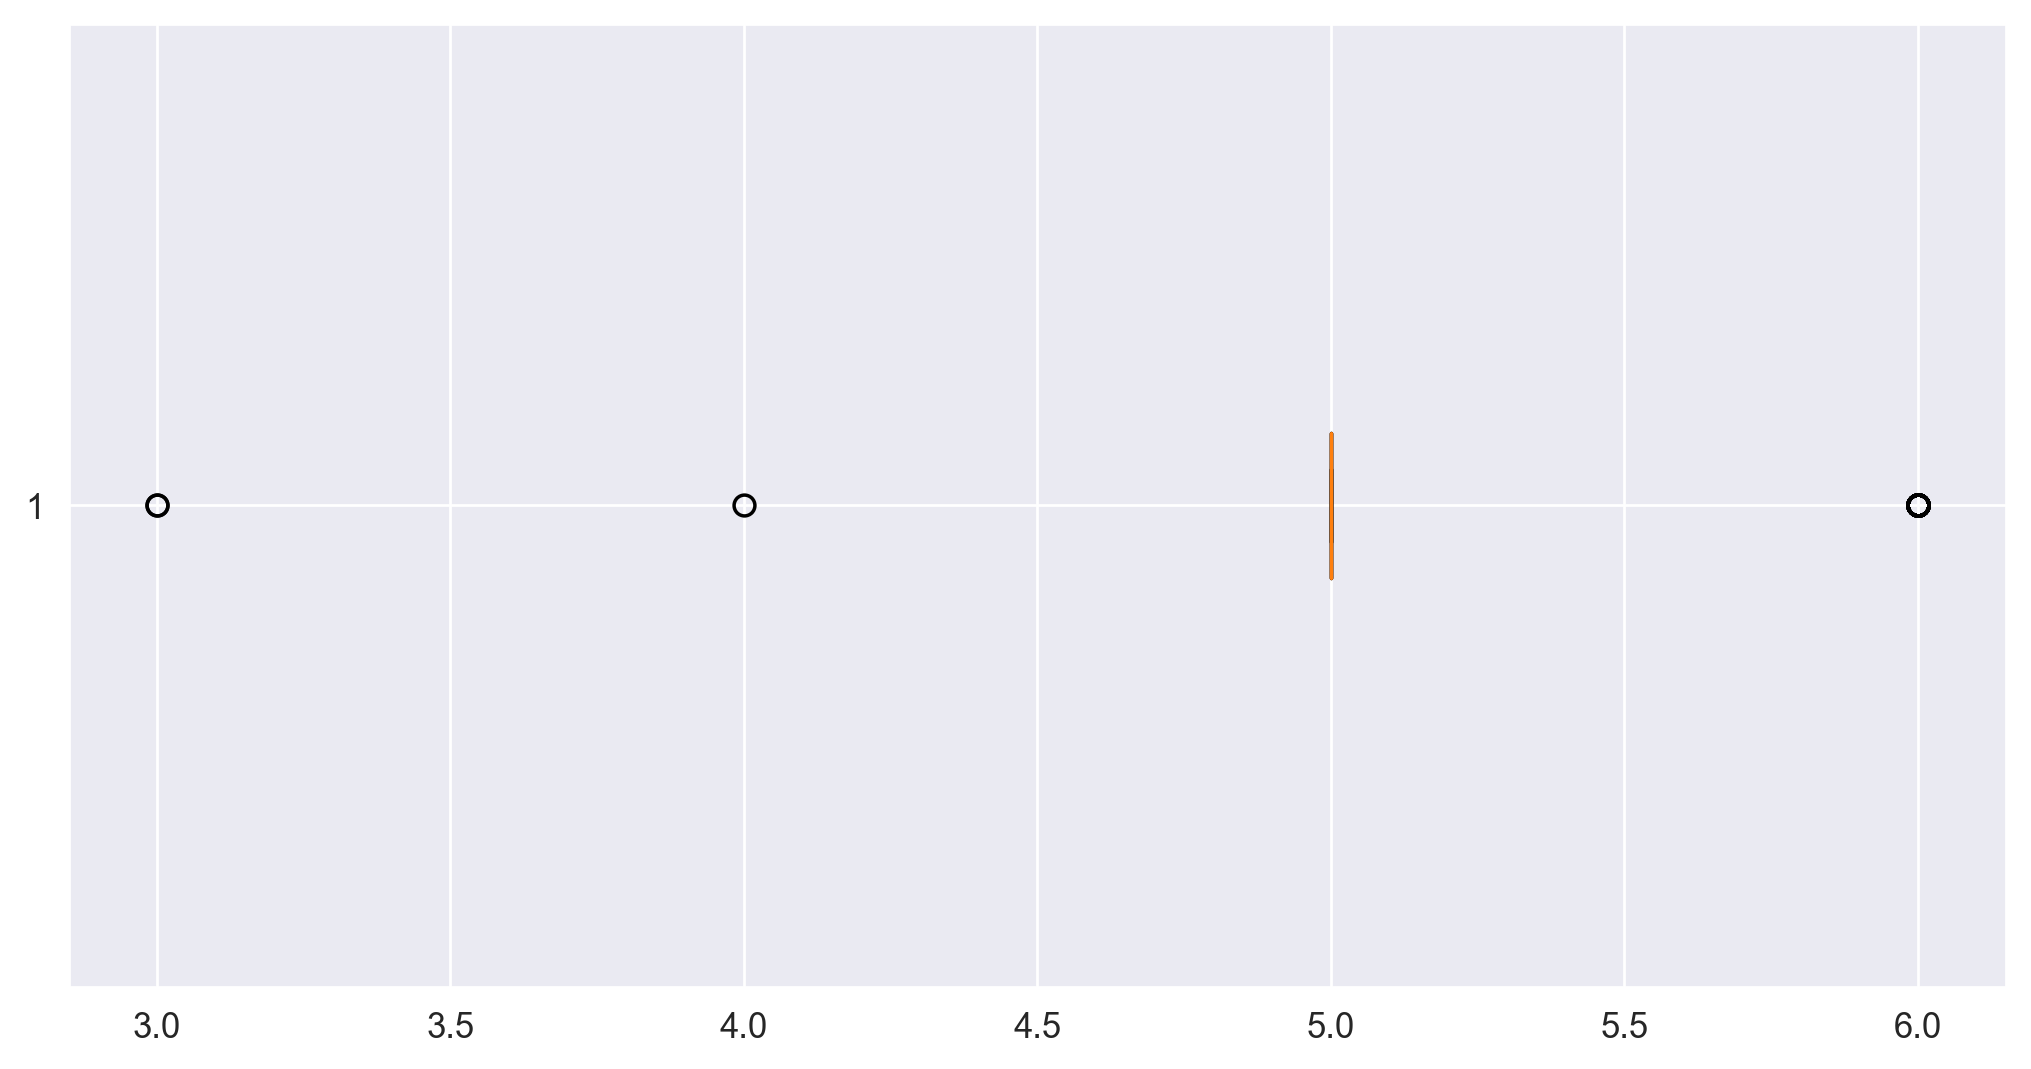

In [43]:
plt.boxplot(data['Gears'],vert=False)
plt.show()

<Axes: >

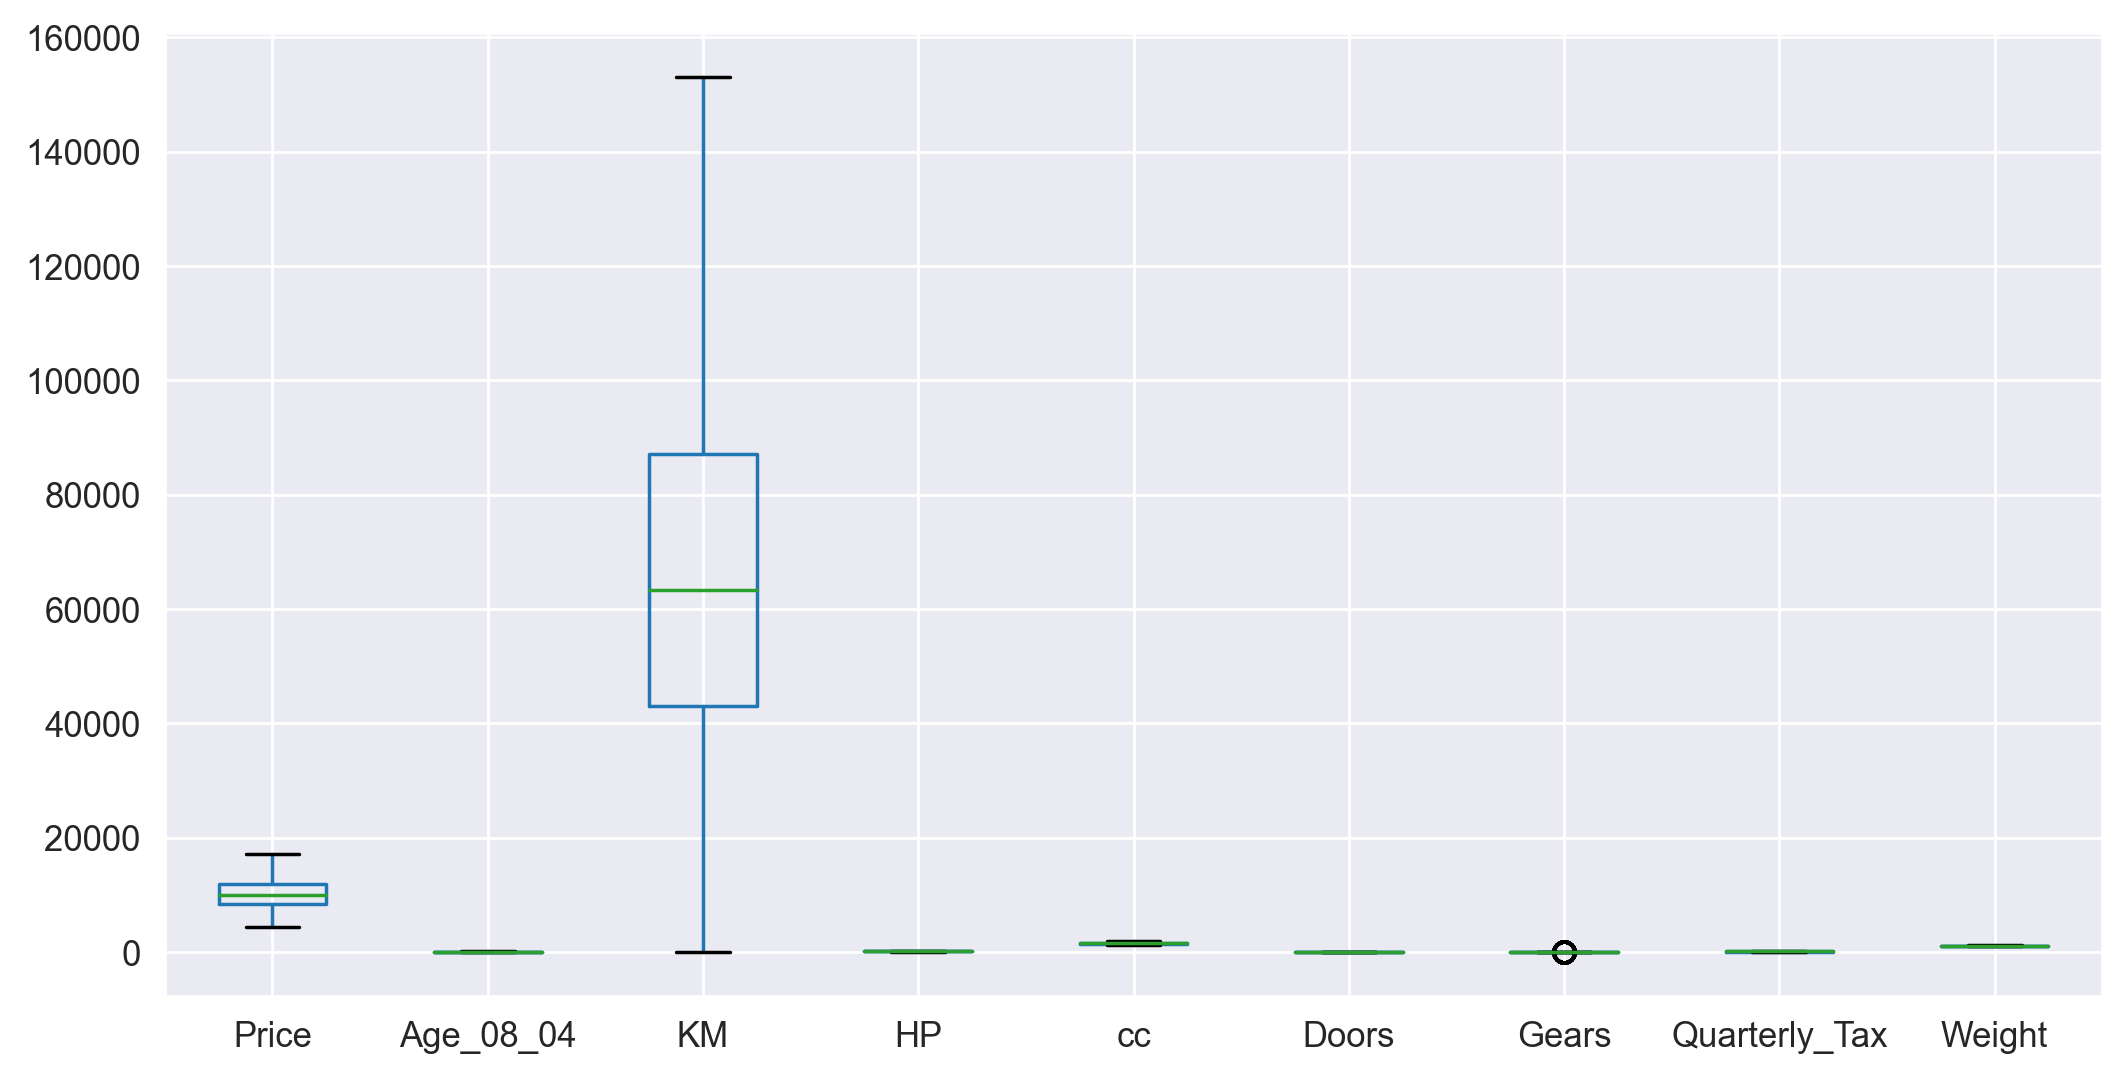

In [44]:
data.boxplot()

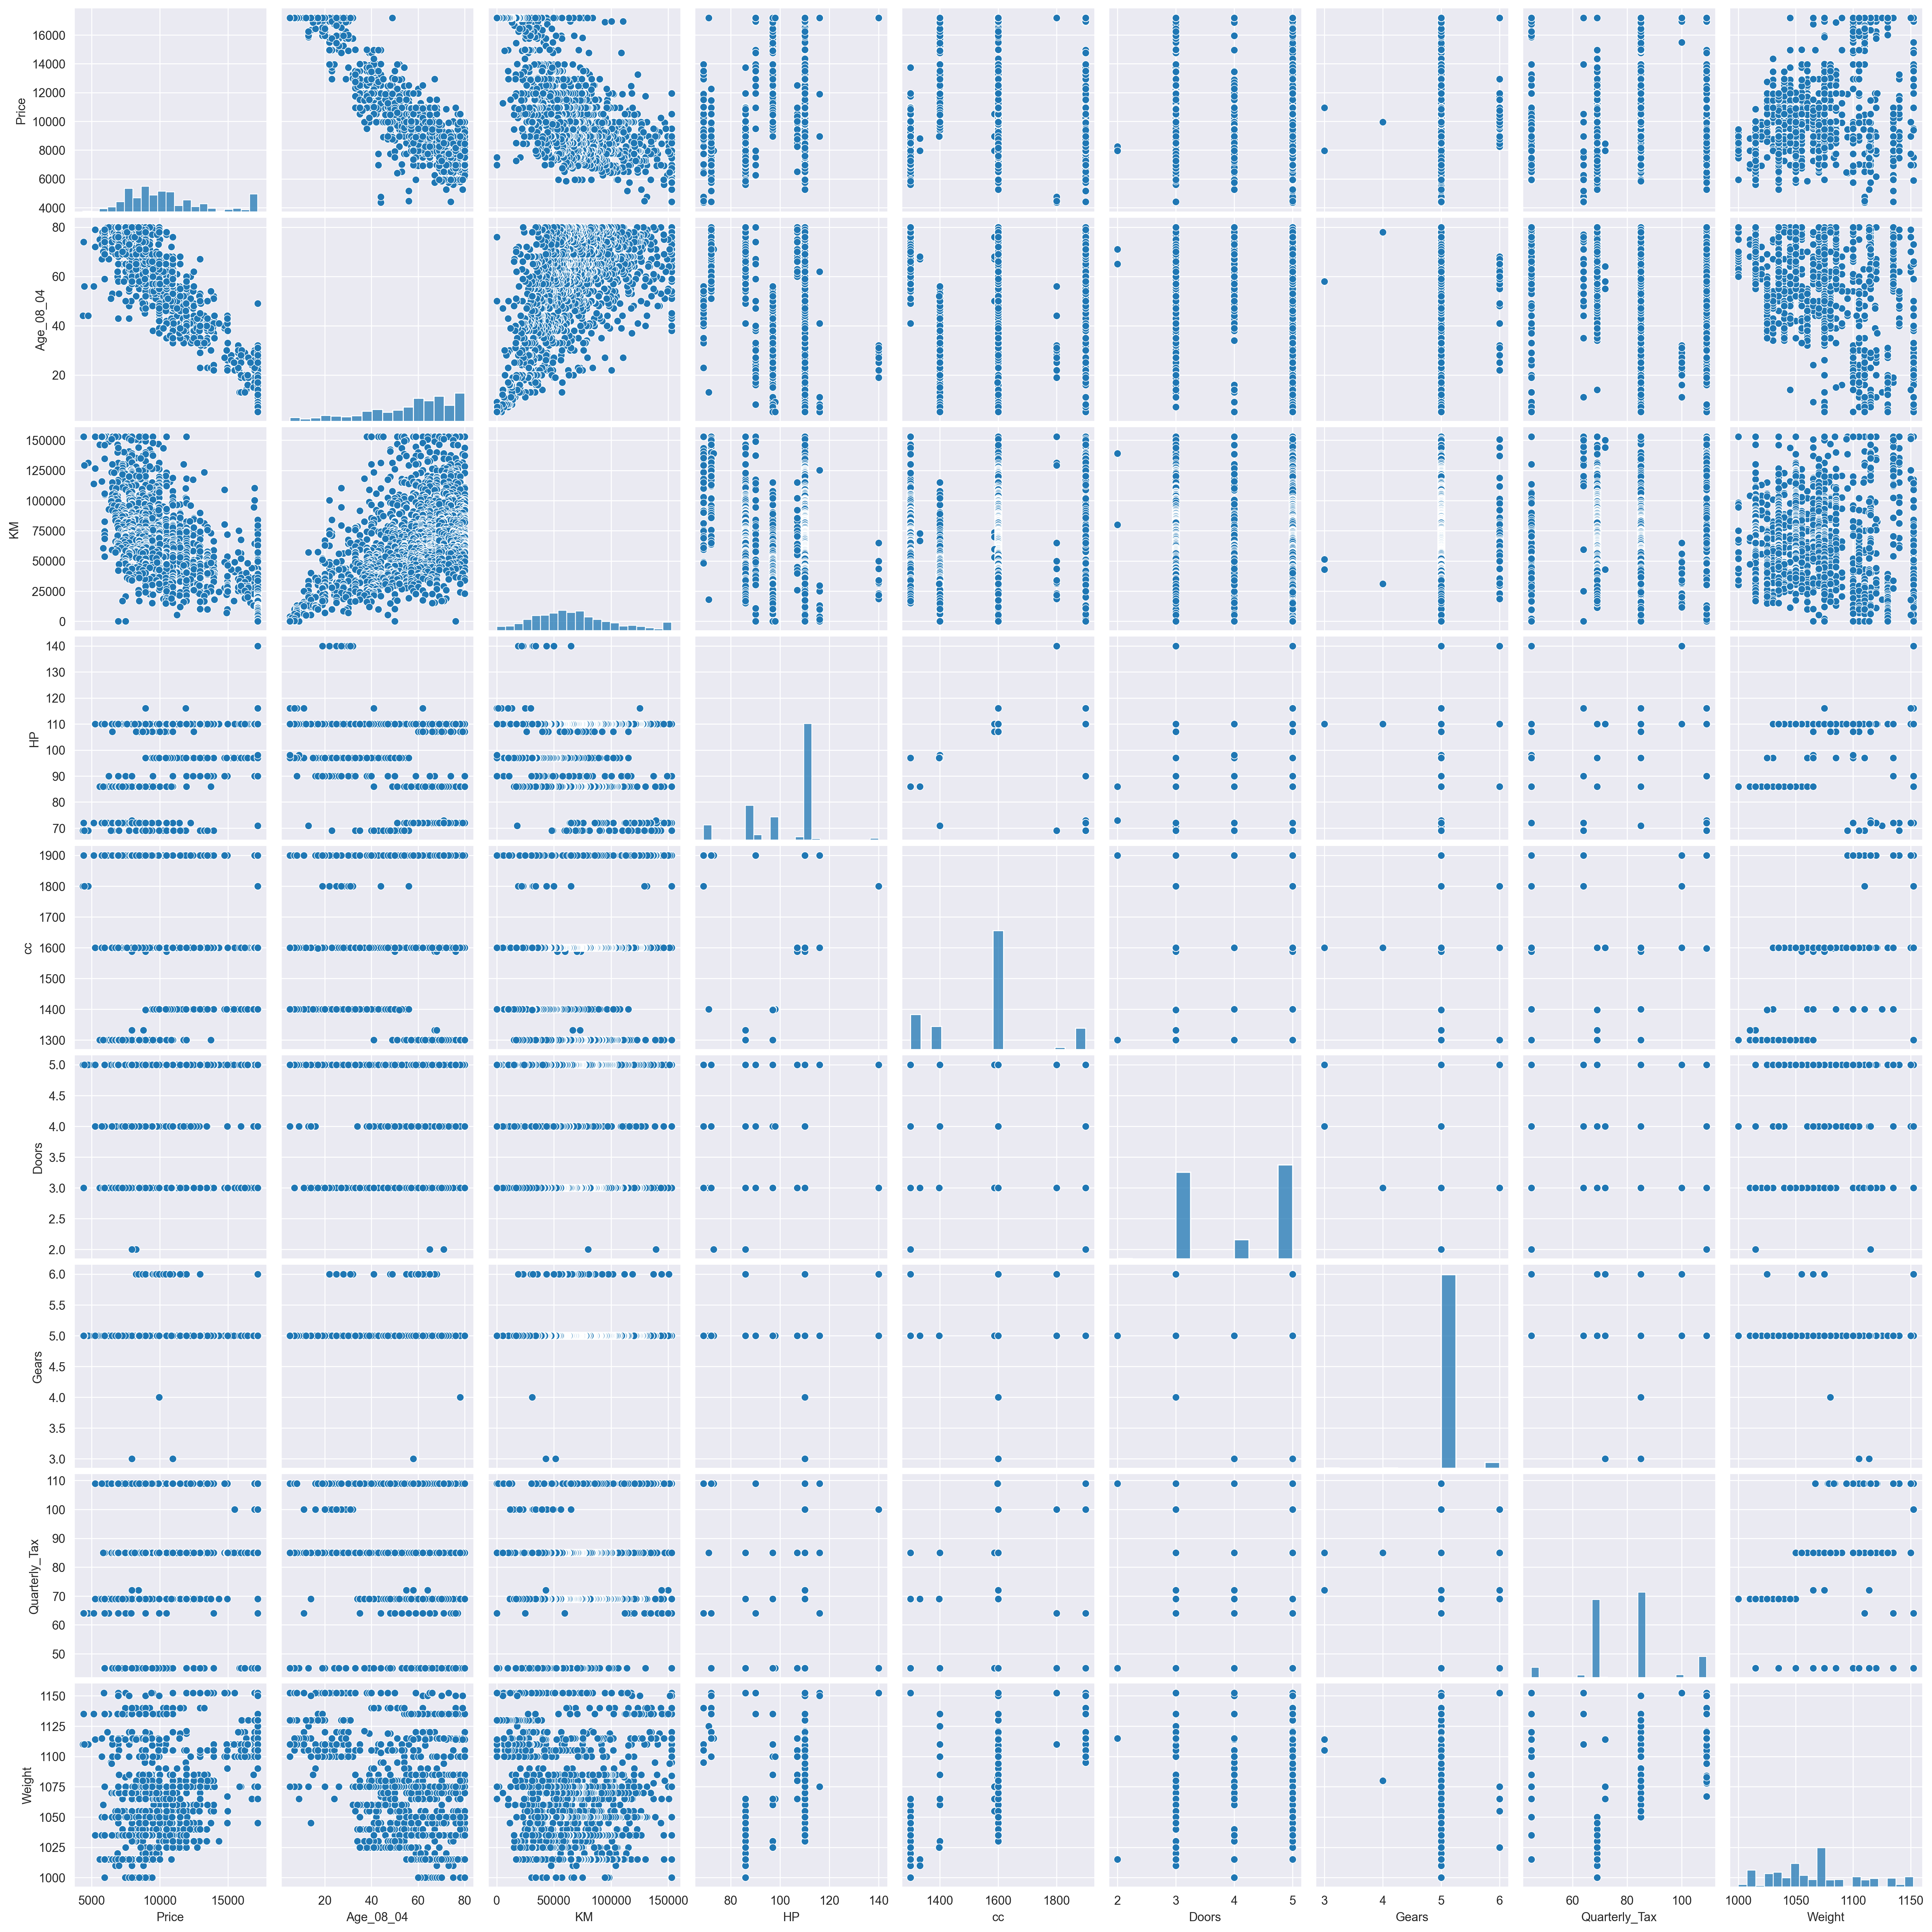

In [45]:
sns.pairplot(data)
plt.show()

In [46]:
data

Price  Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0     13500         23  46986.0   90  1900      3      5            109   
1     13750         23  72937.0   90  1900      3      5            109   
2     13950         24  41711.0   90  1900      3      5            109   
3     14950         26  48000.0   90  1900      3      5            109   
4     13750         30  38500.0   90  1900      3      5            109   
...     ...        ...      ...  ...   ...    ...    ...            ...   
1431   7500         69  20544.0   86  1300      3      5             69   
1432  10845         72  19000.0   86  1300      3      5             69   
1433   8500         71  17016.0   86  1300      3      5             69   
1434   7250         70  16916.0   86  1300      3      5             69   
1435   6950         76      1.0  110  1600      5      5             45   

      Weight  
0     1152.5  
1     1152.5  
2     1152.5  
3     1152.5  
4     1152.5  
...      ...  
1431  1025.0  
1432  1015.0  
1433  1015.0  
1434  1015.0  
1435  1114.0  

[1436 rows x 9 columns]

<Axes: >

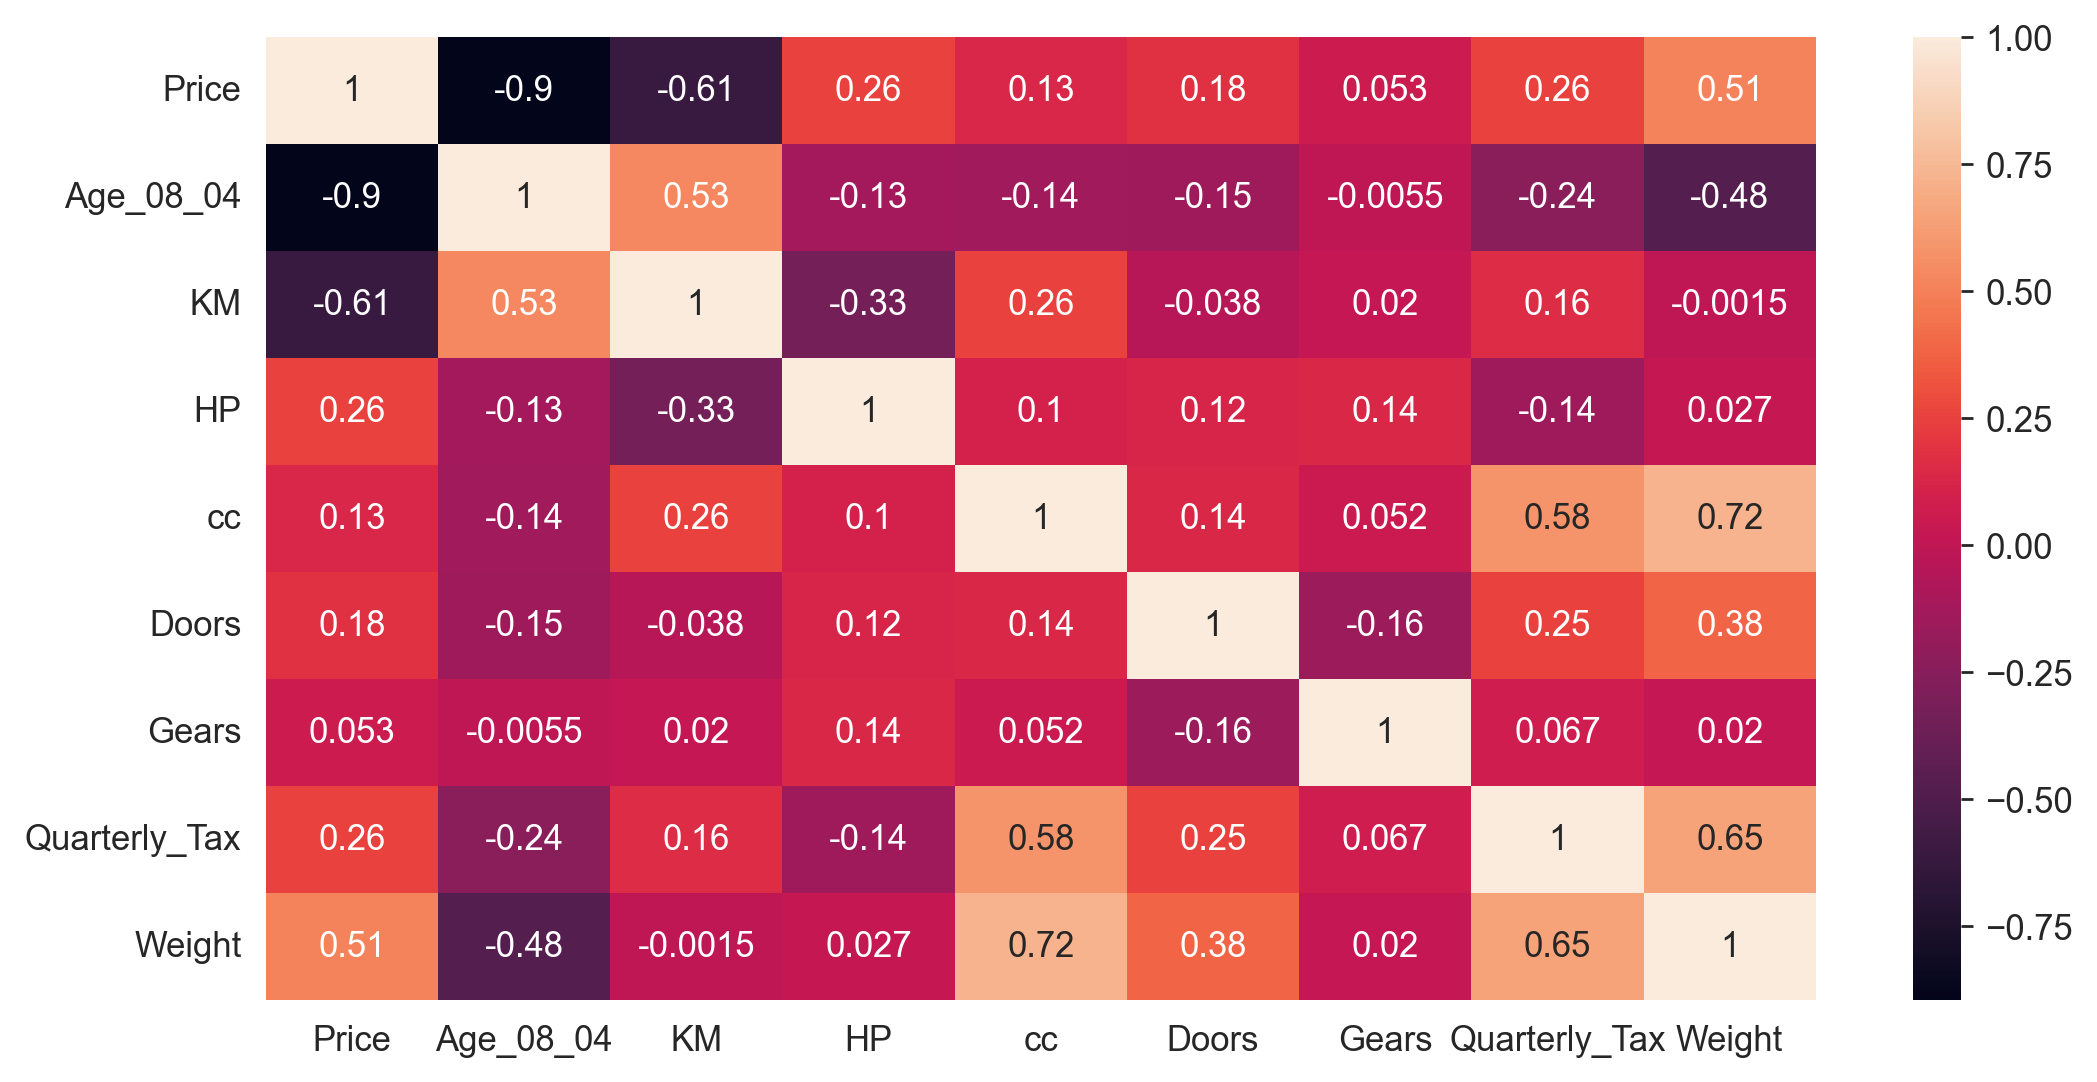

In [47]:
sns.heatmap(data.corr(),annot=True)

# Model Building

In [48]:
import statsmodels.formula.api as smf


In [49]:
data

Price  Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  \
0     13500         23  46986.0   90  1900      3      5            109   
1     13750         23  72937.0   90  1900      3      5            109   
2     13950         24  41711.0   90  1900      3      5            109   
3     14950         26  48000.0   90  1900      3      5            109   
4     13750         30  38500.0   90  1900      3      5            109   
...     ...        ...      ...  ...   ...    ...    ...            ...   
1431   7500         69  20544.0   86  1300      3      5             69   
1432  10845         72  19000.0   86  1300      3      5             69   
1433   8500         71  17016.0   86  1300      3      5             69   
1434   7250         70  16916.0   86  1300      3      5             69   
1435   6950         76      1.0  110  1600      5      5             45   

      Weight  
0     1152.5  
1     1152.5  
2     1152.5  
3     1152.5  
4     1152.5  
...      ...  
1431  1025.0  
1432  1015.0  
1433  1015.0  
1434  1015.0  
1435  1114.0  

[1436 rows x 9 columns]

In [50]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()

In [51]:
model.rsquared

0.8674036665649222

In [52]:
model.pvalues

Intercept         1.564542e-05
Age_08_04        3.618922e-292
KM                1.672391e-42
HP                3.694788e-26
cc                8.972593e-19
Doors             1.409607e-02
Gears             3.146966e-03
Quarterly_Tax     5.357955e-06
Weight            8.207726e-41
dtype: float64

In [53]:
#Simple Linear Regression

In [54]:
model1 = smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model1.rsquared,model1.pvalues

(0.6620891724821809,
 Intercept         6.592956e-72
 KM               2.685215e-140
 HP                2.734217e-10
 cc                3.391502e-25
 Doors             7.631868e-07
 Gears             8.764634e-02
 Quarterly_Tax     1.036045e-05
 Weight           3.494528e-111
 dtype: float64)

In [55]:
model2 = smf.ols('Price~Age_08_04+Doors+Gears+HP+cc+Quarterly_Tax+Weight',data=data).fit()
model2.rsquared,model2.pvalues

(0.8488630184707835,
 Intercept        4.211553e-04
 Age_08_04        0.000000e+00
 Doors            3.891940e-03
 Gears            5.843539e-02
 HP               6.823060e-52
 cc               1.869075e-34
 Quarterly_Tax    2.981521e-04
 Weight           1.168511e-37
 dtype: float64)

In [56]:
model3 = smf.ols('Price~Age_08_04+Doors+Gears+KM+cc+Quarterly_Tax+Weight',data=data).fit()
model3.rsquared,model3.pvalues

(0.8565801213617754,
 Intercept         4.893784e-03
 Age_08_04        1.088040e-276
 Doors             9.978634e-01
 Gears             4.008312e-07
 KM                3.365848e-68
 cc                6.023846e-08
 Quarterly_Tax     4.481215e-02
 Weight            1.202705e-31
 dtype: float64)

In [57]:
model4 = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+Quarterly_Tax+Weight',data=data).fit()
model4.rsquared,model4.pvalues

(0.8599246886742238,
 Intercept         5.587418e-01
 Age_08_04        1.016744e-298
 Doors             9.124065e-01
 Gears             4.830332e-04
 KM                3.926994e-58
 HP                2.025983e-15
 Quarterly_Tax     1.406918e-02
 Weight            9.825005e-24
 dtype: float64)

In [58]:
model5 = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Weight',data=data).fit()
model5.rsquared,model5.pvalues

(0.8654650691690108,
 Intercept     3.092724e-08
 Age_08_04    4.290494e-292
 Doors         5.483517e-02
 Gears         4.960996e-04
 KM            7.280981e-41
 HP            1.621060e-22
 cc            1.495014e-15
 Weight        3.676502e-50
 dtype: float64)

In [59]:
model6 = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Quarterly_Tax',data=data).fit()
model6.rsquared,model6.pvalues

(0.8496813567457122,
 Intercept        9.204234e-33
 Age_08_04        0.000000e+00
 Doors            3.740733e-03
 Gears            7.072104e-04
 KM               2.370233e-39
 HP               6.114144e-17
 cc               7.285890e-01
 Quarterly_Tax    1.658391e-15
 dtype: float64)

In [60]:
model7 = smf.ols('Price~Age_08_04+Gears+KM+HP+cc+Quarterly_Tax+Weight',data=data).fit()
model7.rsquared,model7.pvalues

(0.8668423452214519,
 Intercept         8.472502e-05
 Age_08_04        2.252279e-296
 Gears             3.718801e-04
 KM                4.920216e-43
 HP                7.441714e-25
 cc                1.839158e-17
 Quarterly_Tax     1.813106e-05
 Weight            2.334606e-41
 dtype: float64)

In [61]:
model8 = smf.ols('Price~Age_08_04+Doors+KM+HP+cc+Quarterly_Tax+Weight',data=data).fit()
model8.rsquared,model8.pvalues

(0.8665906185788733,
 Intercept         8.337126e-04
 Age_08_04        4.147366e-291
 Doors             1.589060e-03
 KM                2.079802e-41
 HP                6.863935e-30
 cc                1.519646e-19
 Quarterly_Tax     9.036022e-07
 Weight            1.939734e-41
 dtype: float64)

In [62]:
#Calculate VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
data1 = data.drop(columns=['Price'])
data1

Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986.0   90  1900      3      5            109  1152.5
1            23  72937.0   90  1900      3      5            109  1152.5
2            24  41711.0   90  1900      3      5            109  1152.5
3            26  48000.0   90  1900      3      5            109  1152.5
4            30  38500.0   90  1900      3      5            109  1152.5
...         ...      ...  ...   ...    ...    ...            ...     ...
1431         69  20544.0   86  1300      3      5             69  1025.0
1432         72  19000.0   86  1300      3      5             69  1015.0
1433         71  17016.0   86  1300      3      5             69  1015.0
1434         70  16916.0   86  1300      3      5             69  1015.0
1435         76      1.0  110  1600      5      5             45  1114.0

[1436 rows x 8 columns]

In [65]:
data1.values

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       [2.4000e+01, 4.1711e+04, 9.0000e+01, ..., 5.0000e+00, 1.0900e+02,
        1.1525e+03],
       ...,
       [7.1000e+01, 1.7016e+04, 8.6000e+01, ..., 5.0000e+00, 6.9000e+01,
        1.0150e+03],
       [7.0000e+01, 1.6916e+04, 8.6000e+01, ..., 5.0000e+00, 6.9000e+01,
        1.0150e+03],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, ..., 5.0000e+00, 4.5000e+01,
        1.1140e+03]])

In [66]:
vif = pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [67]:
vif['Features'] = data1.columns
vif

Features
0      Age_08_04
1             KM
2             HP
3             cc
4          Doors
5          Gears
6  Quarterly_Tax
7         Weight

In [68]:
range(len(data1.columns))

range(0, 8)

In [69]:
vif['VIF'] = [variance_inflation_factor(data1.values,i) for i in range(len(data1.columns))]

In [70]:
vif

Features         VIF
0      Age_08_04   16.626931
1             KM    9.266828
2             HP   81.295363
3             cc  212.351262
4          Doors   24.875825
5          Gears  614.543890
6  Quarterly_Tax   55.909536
7         Weight  984.277030

In [71]:
#Subset Selection
#AIC

In [72]:
model1 = smf.ols('Price~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model1.rsquared,model1.aic

(0.6620891724821809, 25508.993833210647)

In [73]:
model5 = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Weight',data=data).fit()
model5.rsquared,model5.aic

(0.8654650691690108, 24186.497911631468)

In [74]:
model6 = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Quarterly_Tax',data=data).fit()
model6.rsquared,model6.aic

(0.8496813567457122, 24345.79835336175)

In [75]:
#MODEL VALIDATION TECHNIQUES
modelr = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Weight',data=data).fit()
modelr.rsquared

0.8654650691690108

In [76]:
#Statsmodel
import statsmodels.api as sm

In [77]:
data.head()

Price  Age_08_04       KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986.0  90  1900      3      5            109  1152.5
1  13750         23  72937.0  90  1900      3      5            109  1152.5
2  13950         24  41711.0  90  1900      3      5            109  1152.5
3  14950         26  48000.0  90  1900      3      5            109  1152.5
4  13750         30  38500.0  90  1900      3      5            109  1152.5

In [78]:
modelr.resid

0      -1758.895436
1      -1093.473811
2      -1286.625746
3         27.471058
4       -897.758269
           ...     
1431   -1642.167733
1432    2227.867352
1433    -255.603855
1434   -1613.916134
1435   -3582.361404
Length: 1436, dtype: float64

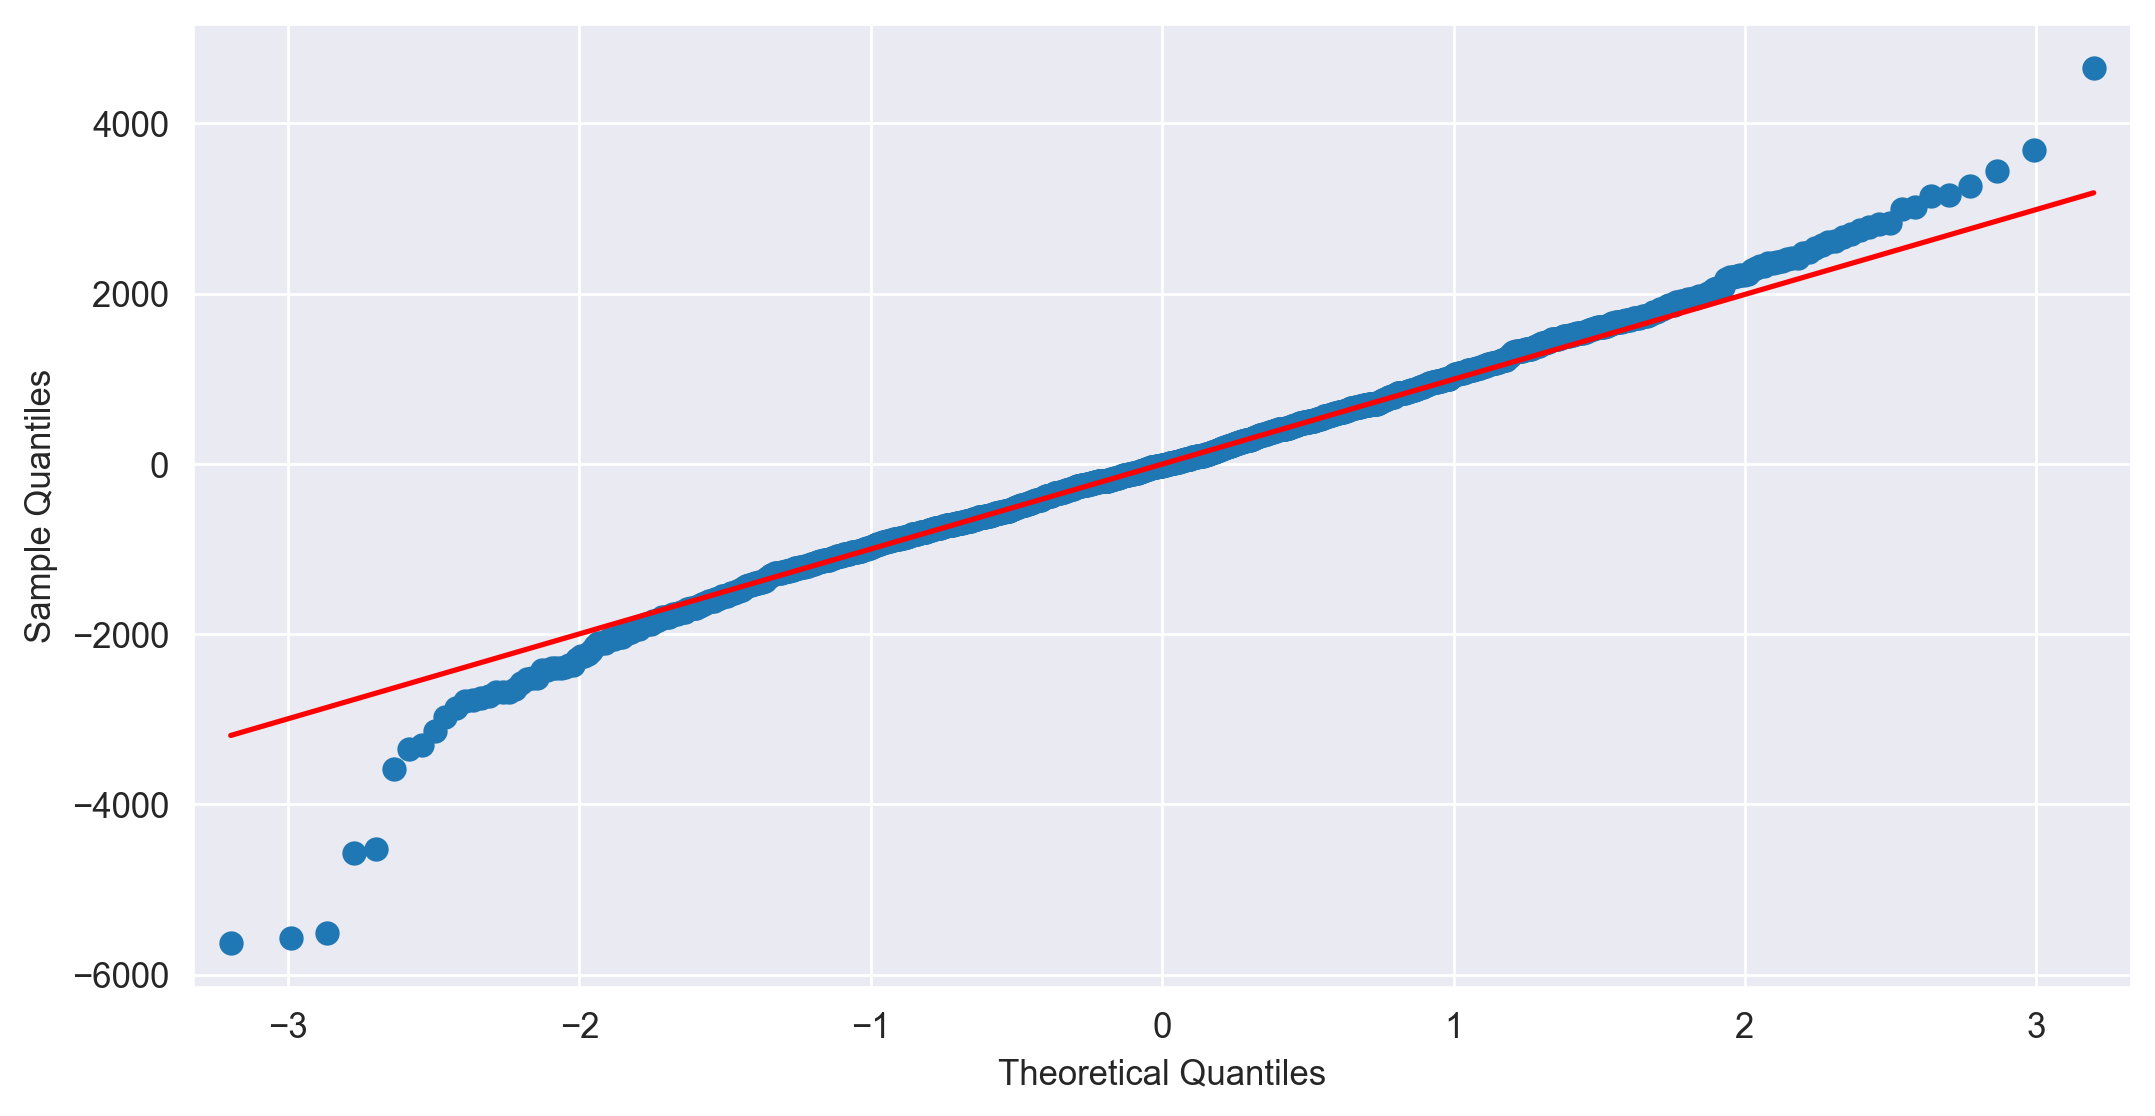

In [79]:
#Q-Q plot
sm.qqplot(modelr.resid, line = 'q');

In [80]:
#get index for higher residuals
np.argmax(modelr.resid), np.max(modelr.resid)

(523, 4651.328778095958)

In [81]:
#MODEL DELETION TECHNIQUES
#Cook's Distance

#Find the influence data
inf = modelr.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [82]:
c

array([2.86922294e-03, 1.06525480e-03, 1.57451111e-03, ...,
       5.00765418e-05, 1.95603252e-03, 2.07005190e-02])

<StemContainer object of 3 artists>

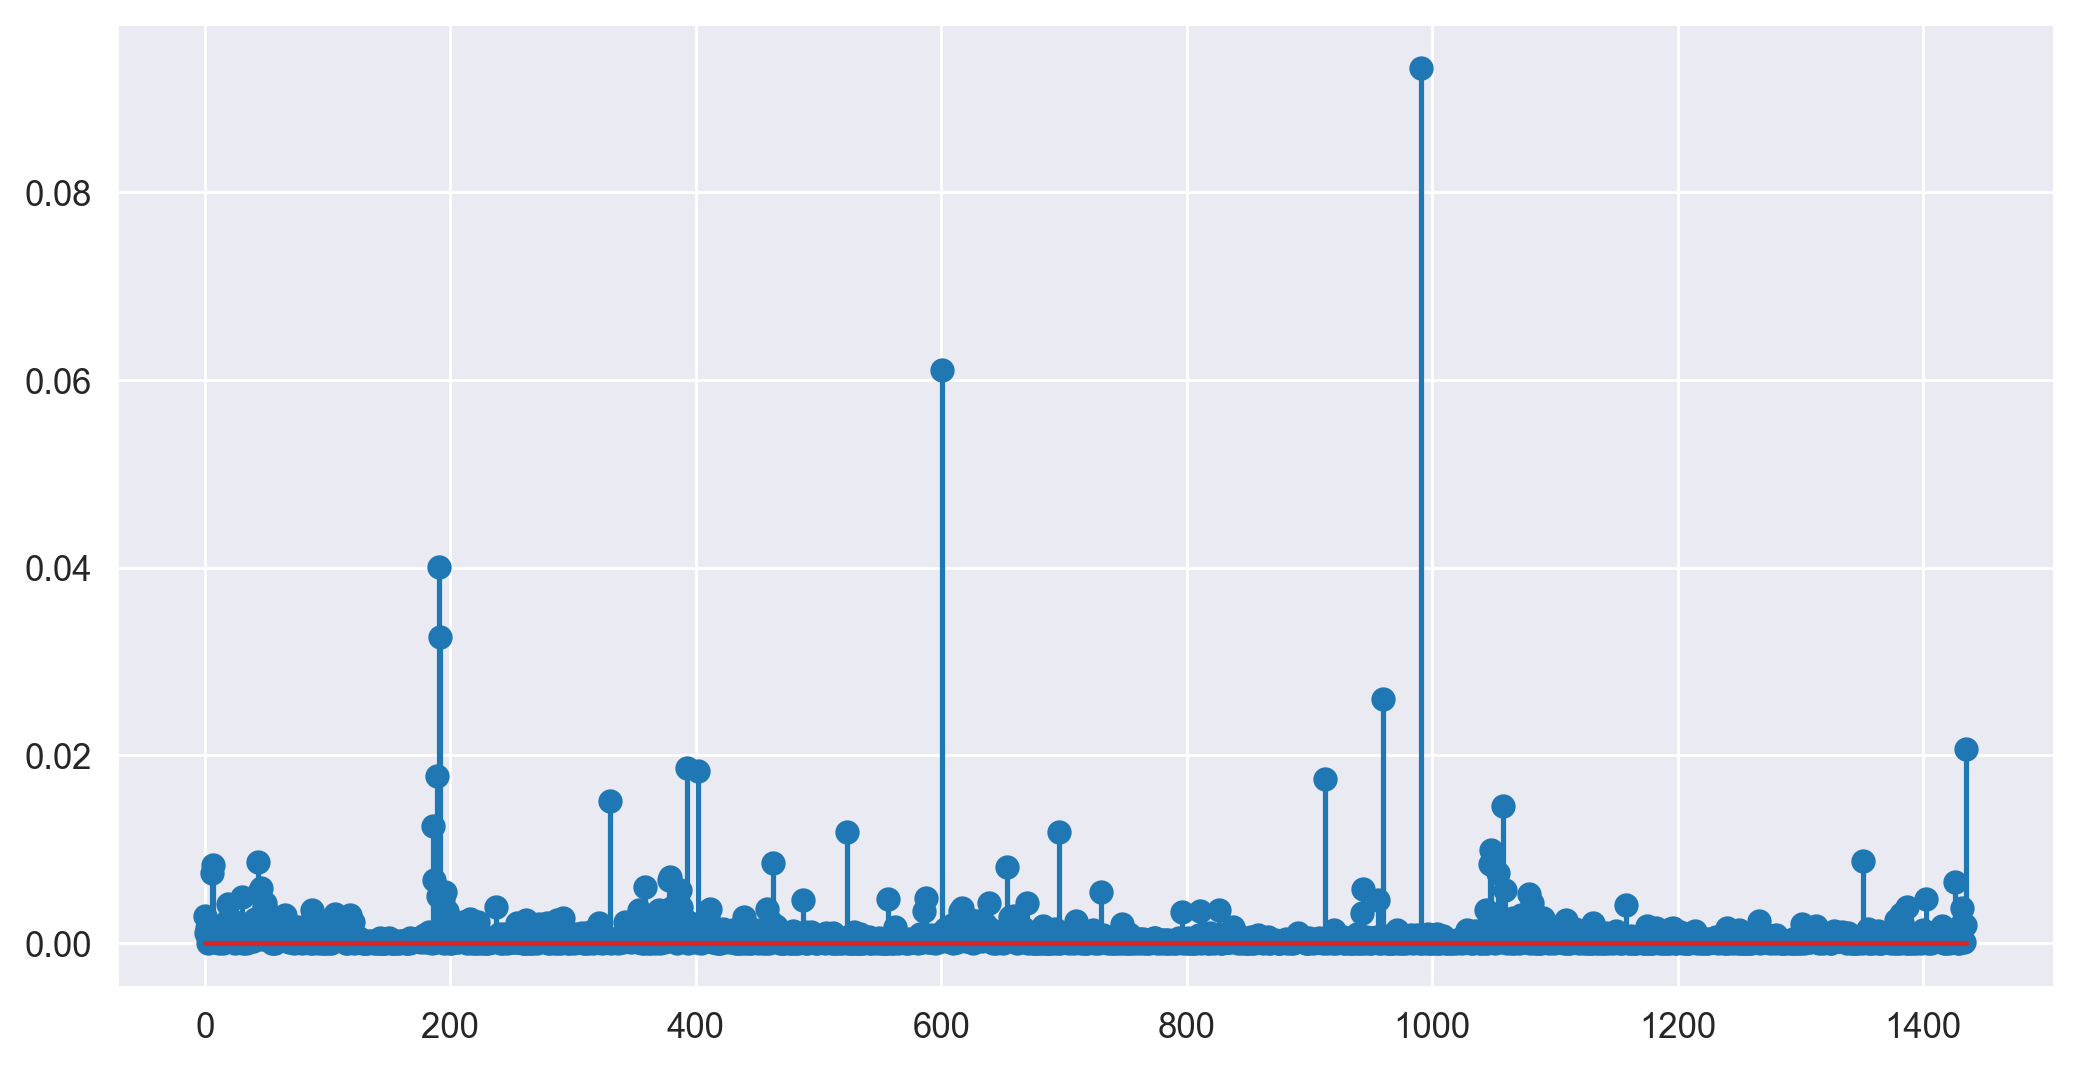

In [83]:
# Cook's distance plot
plt.stem(c)

In [84]:
np.argmax(c), np.max(c)

(991, 0.09325536605551027)

In [85]:
data.iloc[[991]]

Price  Age_08_04       KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
991   7950         58  43000.0  110  1600      4      3             72  1114.0

In [86]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

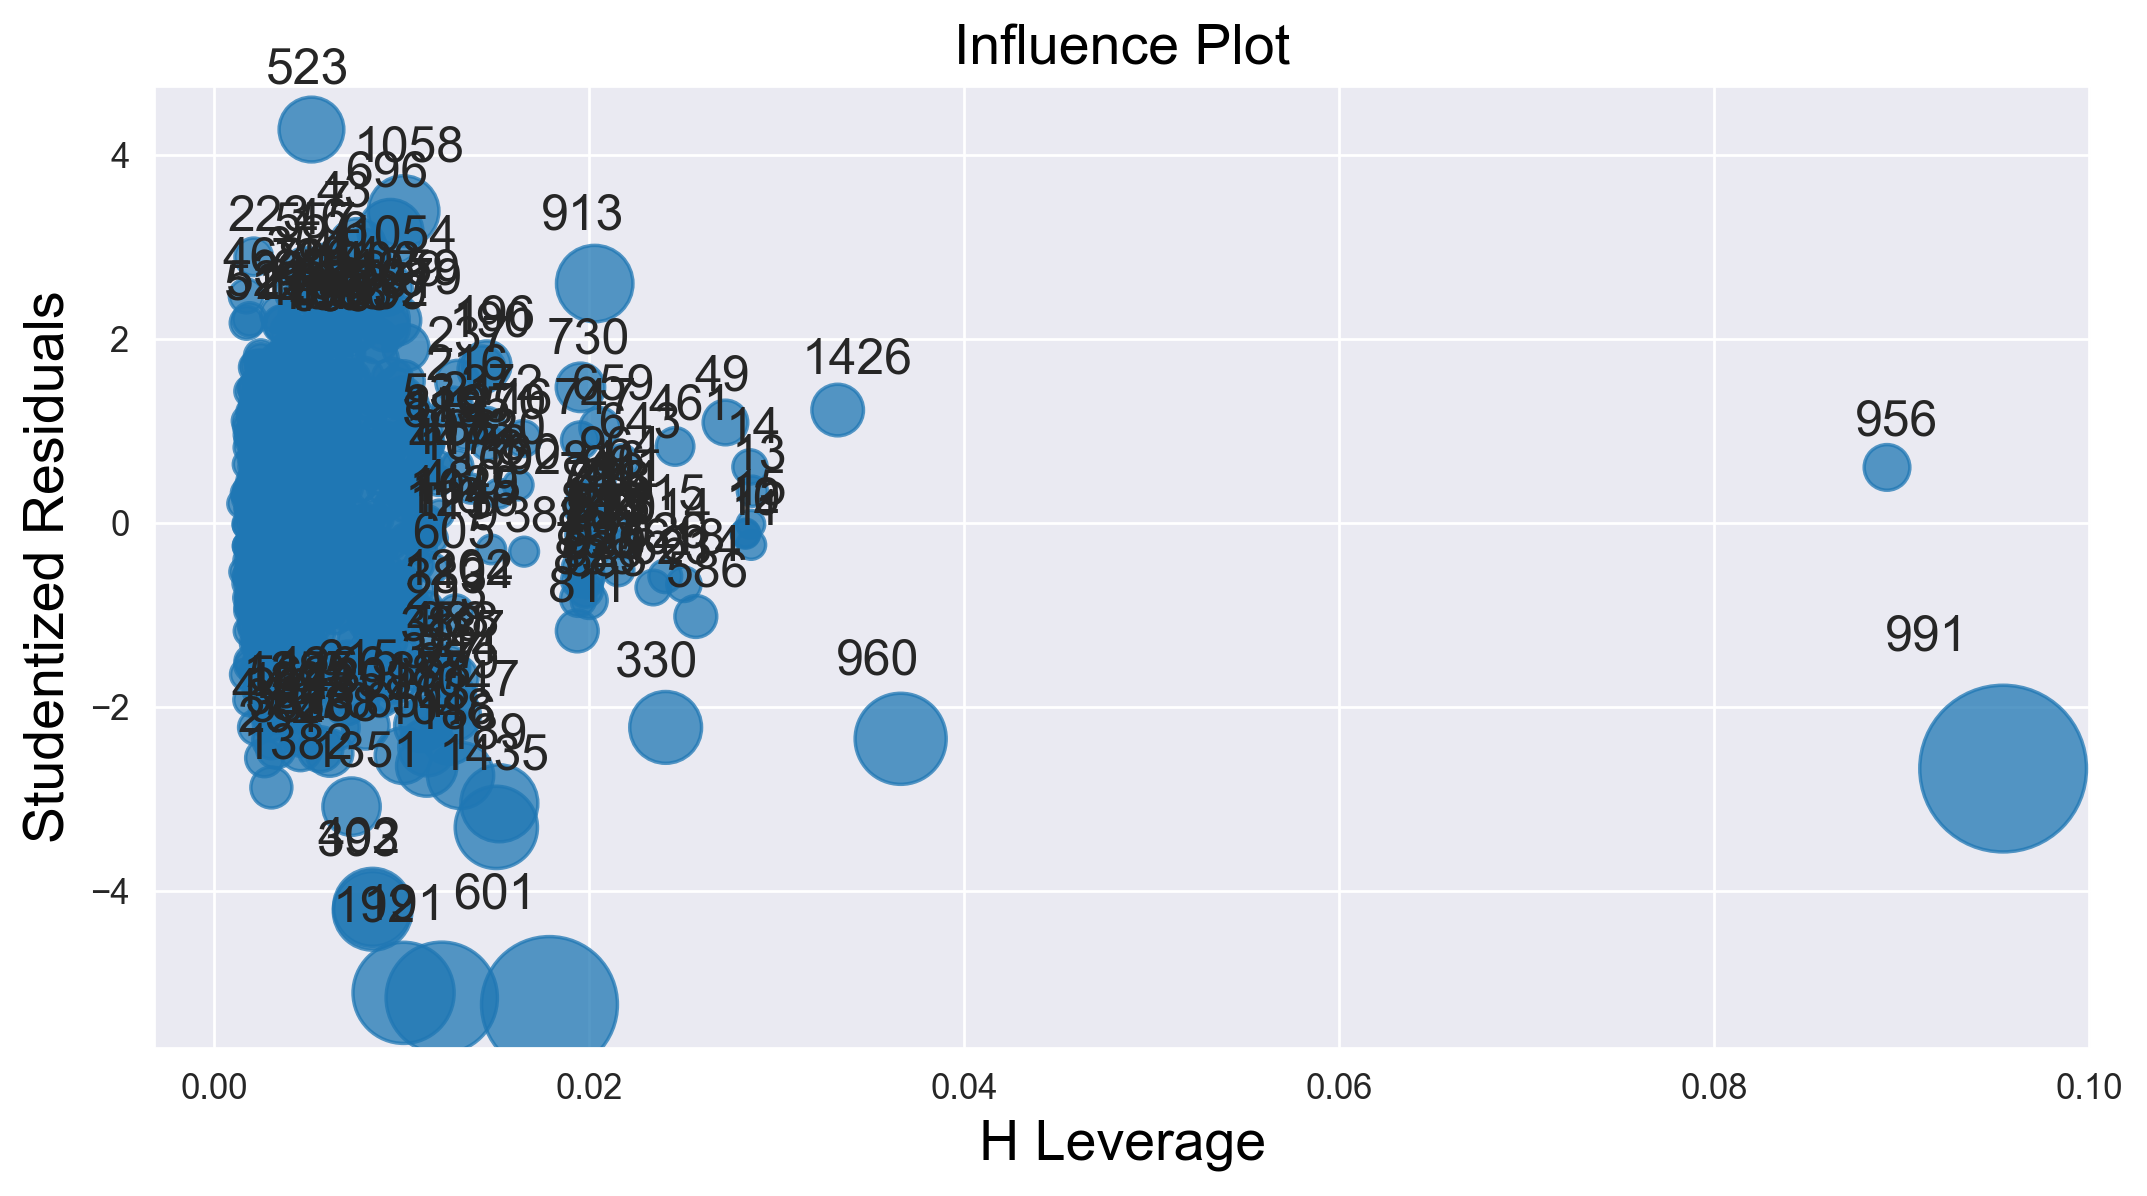

In [87]:
influence_plot(modelr);

In [88]:
#Improving the mode

In [89]:
data.drop(index=991,inplace=True)

In [90]:
#reset the index
data.reset_index(inplace=True)

In [91]:
data

index  Price  Age_08_04       KM   HP    cc  Doors  Gears  \
0         0  13500         23  46986.0   90  1900      3      5   
1         1  13750         23  72937.0   90  1900      3      5   
2         2  13950         24  41711.0   90  1900      3      5   
3         3  14950         26  48000.0   90  1900      3      5   
4         4  13750         30  38500.0   90  1900      3      5   
...     ...    ...        ...      ...  ...   ...    ...    ...   
1430   1431   7500         69  20544.0   86  1300      3      5   
1431   1432  10845         72  19000.0   86  1300      3      5   
1432   1433   8500         71  17016.0   86  1300      3      5   
1433   1434   7250         70  16916.0   86  1300      3      5   
1434   1435   6950         76      1.0  110  1600      5      5   

      Quarterly_Tax  Weight  
0               109  1152.5  
1               109  1152.5  
2               109  1152.5  
3               109  1152.5  
4               109  1152.5  
...             ...     ...  
1430             69  1025.0  
1431             69  1015.0  
1432             69  1015.0  
1433             69  1015.0  
1434             45  1114.0  

[1435 rows x 10 columns]

In [92]:
data["Quarterly_Tax"].unique()

array([109, 100,  85,  45,  69,  64,  72], dtype=int64)

In [93]:
final_model = smf.ols('Price~Age_08_04+Doors+Gears+KM+HP+cc+Weight',data=data).fit()
final_model.rsquared

0.8660629331738396

In [94]:
#Predicting for new records
test = pd.DataFrame({
    'Age_08_04' : [52,72,39,62,76],
    'KM' : [15622,18652,12564,11235,10895],
    'HP' : [75,90,87,96,92],
    'cc' : [1500,1800,1200,1300,1700],
    'Gears' : [6,3,4,5,4],
    'Doors' : [4,5,3,3,2],
    'Quarterly_Tax' : [100,85,64,69,109],
    'Weight' : [1115,1035,1018,1035,1165],
    })

In [95]:
test

Age_08_04     KM  HP    cc  Gears  Doors  Quarterly_Tax  Weight
0         52  15622  75  1500      6      4            100    1115
1         72  18652  90  1800      3      5             85    1035
2         39  12564  87  1200      4      3             64    1018
3         62  11235  96  1300      5      3             69    1035
4         76  10895  92  1700      4      2            109    1165

In [96]:
final_model.predict(test)

0    12725.744191
1     7015.930871
2    12145.441784
3    10529.015898
4    10682.301133
dtype: float64